# Проект №4 - Статистический анализ данных

# Определение перспективного тарифа для телеком компании

_Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов._


В распоряжении данные 500 пользователей «Мегалайна» за 2018 год.

Нужно проанализировать поведение клиентов и сделать вывод — __какой тариф лучше.__


### Сведения по тарифным планам

---

|<font size=3px>Тариф</font>|  <font size=3px>«Смарт»</font> |<font size=3px>«Ультра»</font> |
|:-----------------------   |:-------------|:--------------|
|Ежемесячная плата:         | 550 рублей   | 1950 рублей   |
|Тариф звонки               | 500 минут    | 3000 минут    | 
|Тариф сообщений            | 50 сообщений | 1000 сообщений|
|Тариф интернет             | 15 Гб        | 30 Гб         |
|Сверхпакет звонки          | 3 рубля      | 1 рубль       |
|Сверхпакет сообщения       | 3 рубля      | 1 рубль       |
|Сверхпакет интернет 1 Гб   | 200 рублей   | 150 рублей    |

---

## Шаг 1. Откройте файл с данными и изучите общую информацию

### Импорт библиотек для работы


In [1]:
# отключим предупреждения Anaconda
#import warnings
#warnings.simplefilter('ignore')
#warnings.simplefilter(action='ignore', category=FutureWarning)

#Блок импорта, для работы с библиотеками и модулями
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns

#from math import factorial as fac
import math

# будем отображать графики прямо в jupyter'e
%matplotlib inline

import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
#%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

### Общая информация о файлах
Откроем все файлы и оценим объём признаков и сами таблицы

In [2]:
#Создадим пакет ссылок на файлы импорта
filename_calls = ("/datasets/calls.csv")
filename_internet = ("/datasets/internet.csv")
filename_messages = ("/datasets/messages.csv")
filename_tariffs = ("/datasets/tariffs.csv")
filename_users = ("/datasets/users.csv")

#Импортируем файлы
calls = pd.read_csv(filename_calls)
internet = pd.read_csv(filename_internet)
messages = pd.read_csv(filename_messages)
tariffs = pd.read_csv(filename_tariffs)
users = pd.read_csv(filename_users)

#Сведём все талицы в один кортеж
all_table = [calls, internet, messages, tariffs, users]

#Дополнительный кортеж наименований таблиц
all_table_name = ['calls', 'internet', 'messages', 'tariffs', 'users']

### Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

In [3]:
#Общая информация
print(calls.info())
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


#### Вывод
* __call_date__ - привести к правильному типу - дата;
* __duration__ - привести к целочисленному типу с округлением вверх.

### Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

In [4]:
#Общая информация
print(internet.info())
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB
None


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


#### Вывод
* __mb_used__ - нужно привести к целочисленному типу с округлением вверх, т.к. в компании "Мегалайн" округление в рамках сессии идёт вверх;
* __session_data__ - скорректировть на тип даты.


### Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

In [5]:
#Общая информация
print(messages.info())
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


#### Вывод
* __message_date__ - переопределить на тип даты.

### Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [6]:
#Общая информация
print(tariffs.info())
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### Вывод
нет проблем с типами

### Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

In [7]:
print(users.info())
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [8]:
print(users.churn_date.describe())
users.churn_date.unique()

count             38
unique            33
top       2018-12-09
freq               2
Name: churn_date, dtype: object


array([nan, '2018-10-05', '2018-12-18', '2018-11-21', '2018-10-03',
       '2018-10-14', '2018-12-09', '2018-12-11', '2018-12-26',
       '2018-08-31', '2018-12-03', '2018-12-23', '2018-11-07',
       '2018-12-16', '2018-12-20', '2018-11-30', '2018-12-21',
       '2018-08-17', '2018-09-02', '2018-10-04', '2018-11-13',
       '2018-11-22', '2018-10-28', '2018-11-26', '2018-11-27',
       '2018-11-16', '2018-10-27', '2018-12-30', '2018-09-27',
       '2018-12-25', '2018-12-14', '2018-12-24', '2018-09-26',
       '2018-10-25'], dtype=object)

#### Вывод
* __churn_date__ - скорректировать на тип даты, необходимо заменить Nan - _предложить методику_;
* __reg_date__ - скорректировать тип даты.

## Шаг 2. Предобработка данных
#### Проверка на дубли

In [9]:
%%time
#проверим на дубли все таблицы и проверим скорость
for table in all_table:
    print(table.duplicated().sum())

0
0
0
0
0
CPU times: user 236 ms, sys: 16 ms, total: 252 ms
Wall time: 286 ms


#### Проверка на None

In [10]:
%%time
#проверим на None все таблицы и проверим скорость
sum = 0
for table in all_table:
    column = list(table.columns)
    for col in column:
        if table[table == None][col].sum() > 0:
            sum += 1
sum

CPU times: user 404 ms, sys: 112 ms, total: 516 ms
Wall time: 529 ms


0

#### Вывод
None и дублей нет, теперь необходимо скорректировать типы представллюемых данных в таблицах и обработать пустые значения

### Корректировка типов
#### Таблица calls

In [11]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [12]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [13]:
#округлим признак duration вверх, т.к.по условию любого тарифа округление идет по звонкам и интернету вверх
calls['duration'] = calls['duration'].apply(np.ceil)
#сменим тип на целочисленный
calls.duration = calls.duration.astype('int64')
#настроим тип дат
calls.call_date = pd.to_datetime(calls.call_date,format='%Y-%m-%d')
print(calls.info())
#создадим копию таблицы перед внесением изменений
calls_copy = calls
#Оценим разброс и статистики
print(calls.describe())
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB
None
            duration        user_id
count  202607.000000  202607.000000
mean        7.158198    1253.940619
std         5.959173     144.722751
min         0.000000    1000.000000
25%         2.000000    1126.000000
50%         6.000000    1260.000000
75%        11.000000    1379.000000
max        38.000000    1499.000000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


#### Вывод
Типы данных скорректированы, длительность звонков округлена вверх.
Имеется порядка порядка 19% записей у которых длительность нулевая, чуть позже будет предложено решение по обработке данной проблемы. 

#### Таблица internet

In [14]:
print(internet.info())
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB
None


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [15]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int64')
internet.session_date = pd.to_datetime(internet.session_date, format = '%Y-%m-%d')
print(internet.info())
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB
None


,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


#### Вывод
Типы данных приведены корректно
#### Таблица messages

In [16]:
messages.message_date = pd.to_datetime(messages.message_date, format='%Y-%m-%d')
print(messages.info())
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


#### Вывод
Типы данных приведены корректно
#### Таблица users

In [17]:
users.reg_date = pd.to_datetime(users.reg_date,format='%Y-%m-%d')
users.churn_date.fillna('2099-01-01T00:00:00.000000000', inplace=True)
users.churn_date = pd.to_datetime(users.churn_date,format='%Y-%m-%d')
print(users.info())
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,2099-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2099-01-01,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2099-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2099-01-01,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2099-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Вывод
 Типы приведены корректно
 
--- 
 
## Вывод
None пропусков в таблицах нет, типы данных скорректированы(столбцы дат и целочисленных значений). В таблице users признак churn_date пришлось заполнить "заглушкой" - 2099-01-01 для того, чтобы можно было проставить корректный тип данных. Округление в признаках длительность и  объём для звонков и интернет трафика произведено в большую сторону, согласно условиям данного оператора округление происходит при считывании использования пакета в большую сторну при минимальной единице учета секунда - время, Мб - интернет.

## Шаг 3. Разведочный анализ - EDA

In [18]:
#проверка пропусков
i=0
for table in all_table:
    print(all_table_name[i], '-', table.isna().sum().sum())
    i +=1

calls - 0
internet - 0
messages - 0
tariffs - 0
users - 0


Выделим из даты производные значения год/месяц и день 

In [19]:
calls['year'] = calls.call_date.dt.year
calls['month'] = calls.call_date.dt.month
calls['day'] = calls.call_date.dt.weekday
calls.head()

,id,call_date,duration,user_id,year,month,day
0,1000_0,2018-07-25,0,1000,2018,7,2
1,1000_1,2018-08-17,0,1000,2018,8,4
2,1000_2,2018-06-11,3,1000,2018,6,0
3,1000_3,2018-09-21,14,1000,2018,9,4
4,1000_4,2018-12-15,6,1000,2018,12,5


In [20]:
#Сравним базы пользователей
print('Уникальных пользователей использующих звонки -',len(list(calls.user_id.unique())))
print('Уникальных пользователей использующих интернет -',len(list(internet.user_id.unique())))
print('Уникальных пользователей использующих сообщения -',len(list(messages.user_id.unique())))
print('Уникальных пользователей -',len(list(users.user_id.unique())))

Уникальных пользователей использующих звонки - 492
Уникальных пользователей использующих интернет - 497
Уникальных пользователей использующих сообщения - 426
Уникальных пользователей - 500


Создадим таблицы для возможного анализа пользователей, которые не пользуются какими либо услугами.

In [21]:
user_no_use_call = list(set(list(users.user_id.unique())) - set(calls.user_id.unique()))
user_no_use_internet = list(set(list(users.user_id.unique())) - set(internet.user_id.unique()))
user_no_use_messages = list(set(list(users.user_id.unique())) - set(messages.user_id.unique()))
users[users['user_id'].isin(user_no_use_call)]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
91,1091,36,2099-01-01,Набережные Челны,Вера,Суслова,2018-05-08,ultra
106,1106,67,2099-01-01,Калуга,Исаак,Костин,2018-04-26,ultra
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
231,1231,63,2099-01-01,Чебоксары,Касьян,Авдюков,2018-05-23,ultra
328,1328,44,2099-01-01,Мурманск,Рауль,Аркадьев,2018-10-16,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart
473,1473,18,2099-01-01,Красноярск,Николай,Лебедев,2018-08-05,ultra
489,1489,35,2099-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


Абоненты полностью не использующие сим-курту для звонков - разновозрастные и из разных городов,  а так как выборка небольшая то проанализировать поведение этой группы - невозможно.

In [22]:
print(3/500*100, '%')
users[users['user_id'].isin(user_no_use_internet)]

0.6 %


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
273,1273,46,2099-01-01,Курган,Рэм,Корнилов,2018-05-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Абоненты, не использующие интернет малочисленны - 0,6%. Проананлизировать данную группу также не удастся, т.к. она малочисленна в данной выборке.

In [23]:
print(len(user_no_use_messages)/500*100, '%')
age=pd.qcut(users[users.user_id.isin(user_no_use_messages)]['age'],4)
users[users.user_id.isin(user_no_use_messages)].pivot_table(\
                                                           index=['tariff', age],\
                                                           values=['user_id'],
                                                           aggfunc={'user_id':'count'}\
                                                           ).unstack().unstack().unstack()

14.799999999999999 %


tariff                  smart  ultra
        age                         
user_id (17.999, 34.0]     15      4
        (34.0, 45.5]       11      7
        (45.5, 63.0]       14      5
        (63.0, 75.0]        9      9

Хоть выборка по не использующим звонки, сообщения - достаточно маленькая, но она логичная в своём распределении. Если проанализировать данную таблицу, то отчетливо заметен тренд, что более молодые меньше в большем количестве не используют сообщения в сравнении людьми среднего и страшего возрастов, но данная динамика прослеживается только в тарифе смарт. Более детальный поведенческий и описательный анализ сложно сделать, вследствии недостаточности данных.

In [24]:
len(list(calls.year.unique()))

1

Данные действительно представленны только за один год

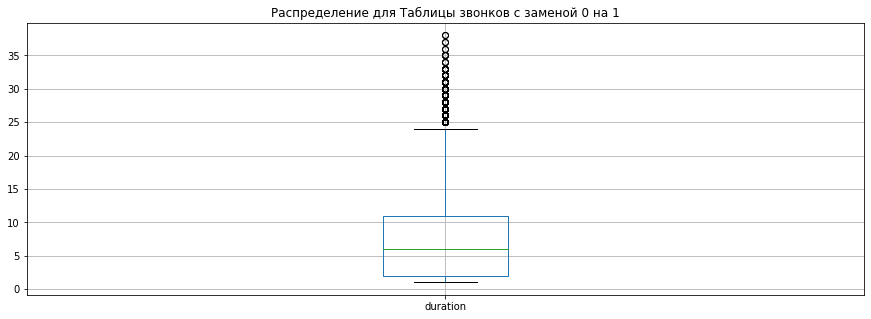

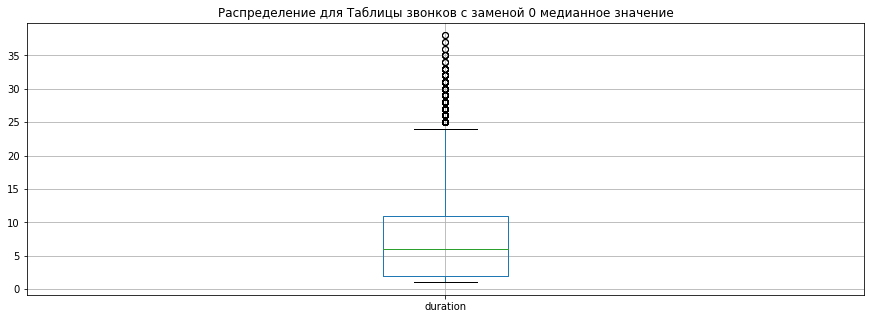

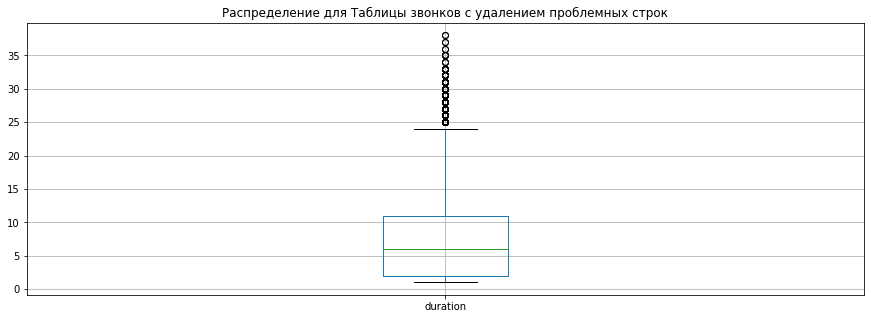

In [25]:
#При построении "Ящика" вследствии неадекватного распределния в выбросы могут попасть значащие данные, поэтому 
#сделаем дополнительные таблицы с медианным значением и единичным вместо нуля
#calls = pd.read_csv(filename_calls)

#Создаю три переменных
calls_without_zero = calls #pd.read_csv(filename_calls)
calls_replace_med = calls #pd.read_csv(filename_calls)
calls_replace_one = calls #pd.read_csv(filename_calls)
#--------------------------------------------------------------------------
calls_replace_one['duration'] = calls_replace_one['duration'].apply(np.ceil)
calls_replace_one.loc[calls_replace_one['duration'] == 0, 'duration'] = 1
calls_replace_one.boxplot(column='duration')
title_boxplot = 'Распределение для Таблицы звонков с заменой 0 на 1'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()
#--------------------------------------------------------------------------
med = calls_replace_med['duration'].median()
calls_replace_med.loc[calls_replace_med['duration'] <1, 'duration'] = med
calls_replace_med.boxplot(column='duration')
title_boxplot = 'Распределение для Таблицы звонков с заменой 0 медианное значение'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()
#--------------------------------------------------------------------------
calls_without_zero = calls_without_zero.query('duration >= 1')
calls_without_zero.boxplot(column='duration')
title_boxplot = 'Распределение для Таблицы звонков с удалением проблемных строк'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()

По проведённому анализу на boxplot можно сказать, что длительность выше значения 25 - выбросы, данные значения лучше убрать из выборки.

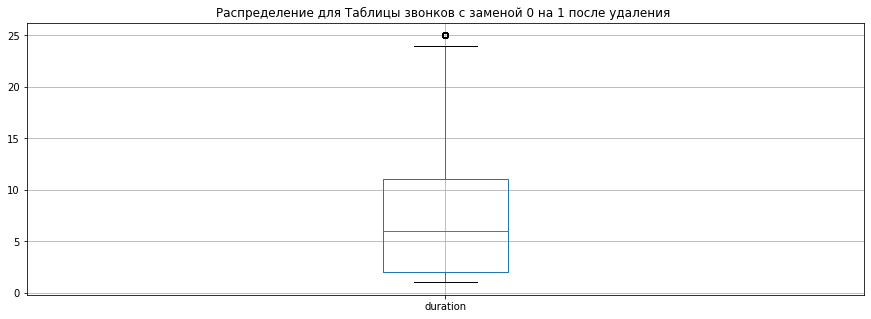

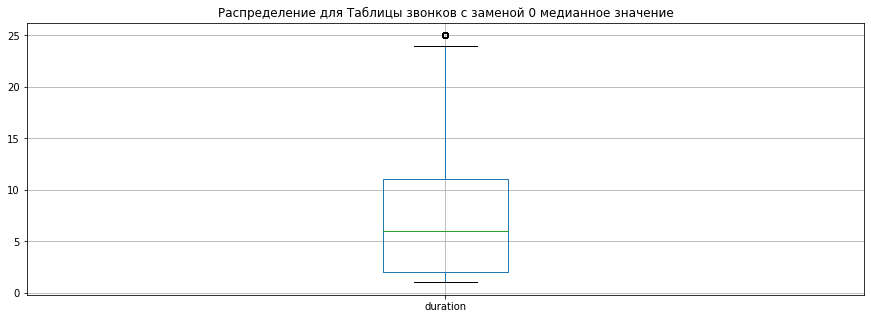

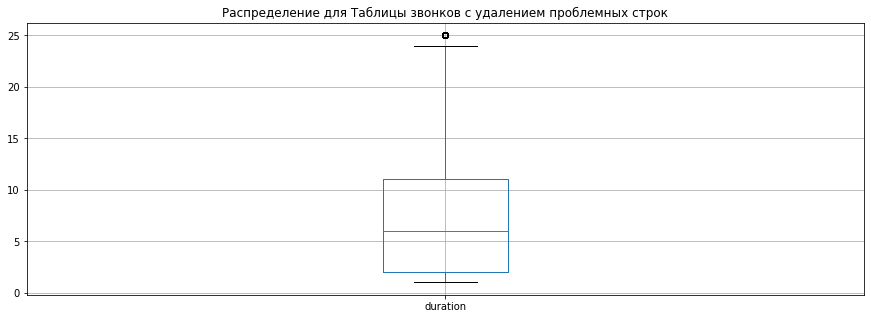

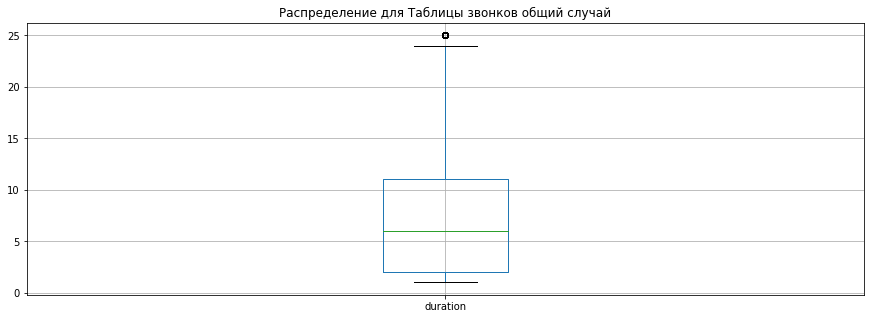

In [26]:
#избавимся от выбросов и проверим статистику
calls_replace_one = calls_replace_one.query('duration <= 25')
calls_replace_med = calls_replace_med.query('duration <= 25')
calls_without_zero = calls_without_zero.query('duration <= 25')


calls_replace_one.boxplot(column='duration')
title_boxplot = 'Распределение для Таблицы звонков с заменой 0 на 1 после удаления '
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()
#--------------------------------------------------------------------------
calls_replace_med.boxplot(column='duration')
title_boxplot = 'Распределение для Таблицы звонков с заменой 0 медианное значение'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()
#--------------------------------------------------------------------------
calls_without_zero.boxplot(column='duration')
title_boxplot = 'Распределение для Таблицы звонков с удалением проблемных строк'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()
#общая таблица звонков
calls = calls.query('duration <= 25')
calls.boxplot(column='duration');
title_boxplot = 'Распределение для Таблицы звонков общий случай'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()

нужно проверить не связаны ли данные выбросы с какой групой и необходимостью выделить  группу выбросов в отдельную выборку

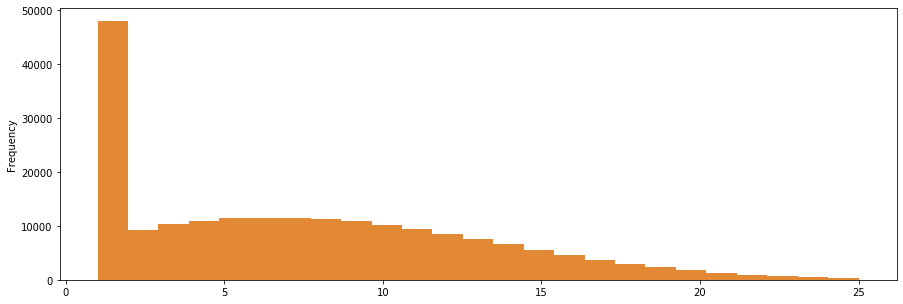

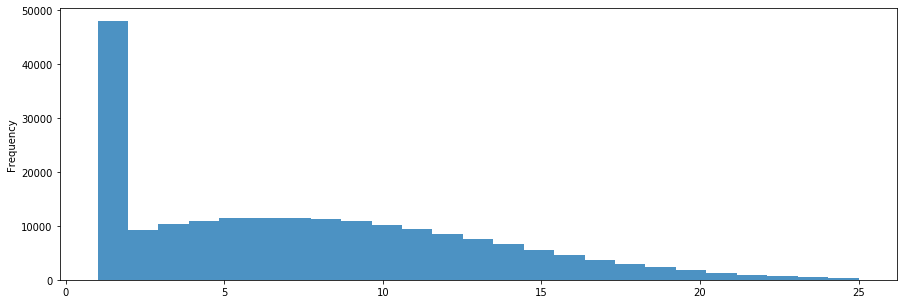

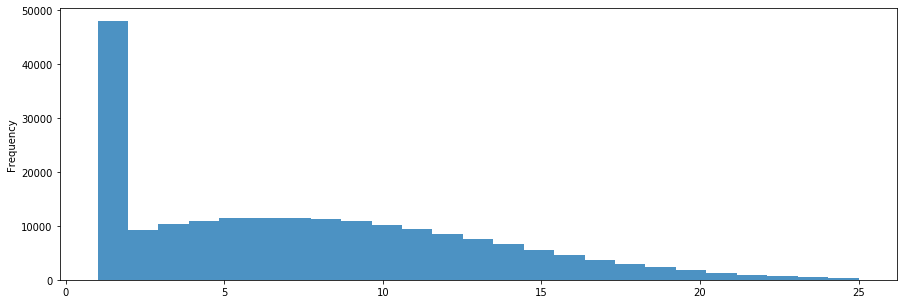

In [27]:
#calls.duration.plot.hist(bins=25, figsize=(15,5), alpha=0.3);
calls_replace_one = calls_replace_one.query('duration <= 25')
calls_replace_med = calls_replace_med.query('duration <= 25')
calls_replace_med = calls_replace_med.query('duration <= 25')


calls.duration.plot.hist(bins=25, figsize=(15,5), alpha=0.6)

calls_replace_one.duration.plot.hist(bins=25, figsize=(15,5), alpha=0.8);
plt.show()
calls_replace_med.duration.plot.hist(bins=25, figsize=(15,5), alpha=0.8);
plt.show()
calls_replace_med.duration.plot.hist(bins=25, figsize=(15,5), alpha=0.8);
plt.show()


In [28]:
calls.pivot_table(index='year', values='duration',aggfunc=('count','min','mean','median','max'))

,count,max,mean,median,min
year,,,,,
2018,201929,25.0,7.285462,6.0,1.0


In [29]:
(calls
 .replace(to_replace = 0,value =1)
 .pivot_table(index='year', values='duration',aggfunc=('count','min','mean','median','max'))
)


,count,max,mean,median,min
year,,,,,
2018,201929,25.0,7.285462,6.0,1.0


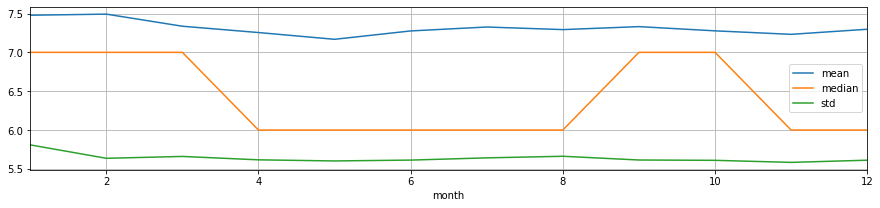

In [30]:
piv = calls.pivot_table(index=['month'],\
                  values='duration',\
                  #columns='day',\
                  aggfunc=('mean','median','std')).plot(grid=True, figsize=(15,3))

#sns.scatterplot(x="call_date", y="duration", hue="month", size="month", data=piv)

##### Сделаем объединение таблиц

In [31]:
calls_and_users = calls.merge(users,left_on='user_id', right_on='user_id')
calls_and_users.head()
calls_and_users['name'] = calls_and_users.first_name+' '+calls_and_users.last_name

##### Удалим лишние столбцы и подготовим для анализа DataFrame

In [32]:
del calls_and_users['first_name']
del calls_and_users['last_name']
del calls_and_users['day']
del calls_and_users['year']
calls_and_users.head()

,id,call_date,duration,user_id,month,age,churn_date,city,reg_date,tariff,name
0,1000_0,2018-07-25,1.0,1000,7,52,2099-01-01,Краснодар,2018-05-25,ultra,Рафаил Верещагин
1,1000_1,2018-08-17,1.0,1000,8,52,2099-01-01,Краснодар,2018-05-25,ultra,Рафаил Верещагин
2,1000_2,2018-06-11,3.0,1000,6,52,2099-01-01,Краснодар,2018-05-25,ultra,Рафаил Верещагин
3,1000_3,2018-09-21,14.0,1000,9,52,2099-01-01,Краснодар,2018-05-25,ultra,Рафаил Верещагин
4,1000_4,2018-12-15,6.0,1000,12,52,2099-01-01,Краснодар,2018-05-25,ultra,Рафаил Верещагин


In [33]:
calls_and_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201929 entries, 0 to 201928
Data columns (total 11 columns):
id            201929 non-null object
call_date     201929 non-null datetime64[ns]
duration      201929 non-null float64
user_id       201929 non-null int64
month         201929 non-null int64
age           201929 non-null int64
churn_date    201929 non-null datetime64[ns]
city          201929 non-null object
reg_date      201929 non-null datetime64[ns]
tariff        201929 non-null object
name          201929 non-null object
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 18.5+ MB


In [34]:
%%time
def func_status(row):
    churn_date = row['churn_date']
    
    if  churn_date.year == 2099:
        return 'активен'
    else:
        return 'неактивен'
    
#calls_and_users['status'] = 'None'   
calls_and_users['status'] = calls_and_users.apply(func_status, axis=1)
calls_and_users.head()

CPU times: user 7.39 s, sys: 120 ms, total: 7.51 s
Wall time: 7.55 s


,id,call_date,duration,user_id,month,age,churn_date,city,reg_date,tariff,name,status
0,1000_0,2018-07-25,1.0,1000,7,52,2099-01-01,Краснодар,2018-05-25,ultra,Рафаил Верещагин,активен
1,1000_1,2018-08-17,1.0,1000,8,52,2099-01-01,Краснодар,2018-05-25,ultra,Рафаил Верещагин,активен
2,1000_2,2018-06-11,3.0,1000,6,52,2099-01-01,Краснодар,2018-05-25,ultra,Рафаил Верещагин,активен
3,1000_3,2018-09-21,14.0,1000,9,52,2099-01-01,Краснодар,2018-05-25,ultra,Рафаил Верещагин,активен
4,1000_4,2018-12-15,6.0,1000,12,52,2099-01-01,Краснодар,2018-05-25,ultra,Рафаил Верещагин,активен


In [35]:
calls_and_users[calls_and_users['duration'] == 0]['duration'].count()/list(calls_and_users.shape)[0]

0.0

Доля нулевых звонков достаточно высокая 19.65%, соответственно любой звонок должен быть тарифицирован

In [36]:
calls_and_users[calls_and_users['duration'] == 0].head()

,id,call_date,duration,user_id,month,age,churn_date,city,reg_date,tariff,name,status


In [37]:
calls_and_users.describe()

,duration,user_id,month,age
count,201929.000000,201929.000000,201929.000000,201929.000000
mean,7.285462,1253.981543,8.573533,47.399744
std,5.619036,144.728488,2.787282,16.467775
min,1.000000,1000.000000,1.000000,18.000000
25%,2.000000,1126.000000,7.000000,33.000000
50%,6.000000,1260.000000,9.000000,47.000000
75%,11.000000,1379.000000,11.000000,63.000000
max,25.000000,1499.000000,12.000000,75.000000


In [38]:
def func(row):
    age = row.age
    if 18 <= age <32:
        return 'молодой'
    elif 32 <= age <46:
         return 'средний'
    elif 46 <= age <62:
         return 'пожилой'
    else:
         return 'преклонный'

calls_and_users['age_group'] = calls_and_users.apply(func, axis=1)
#calls_and_users['age_group'].hist()

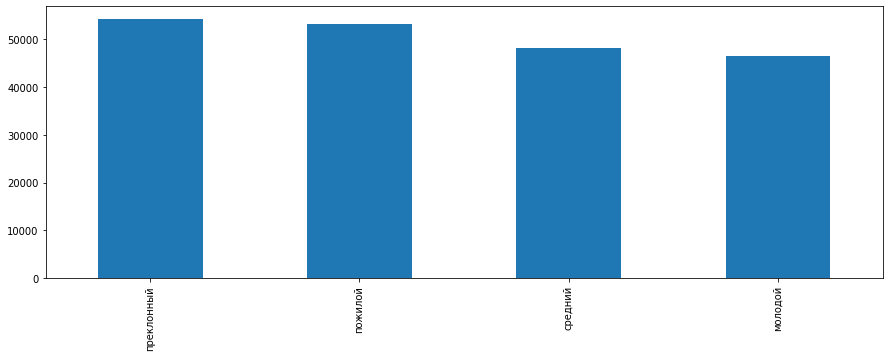

In [39]:
calls_and_users[calls_and_users['duration'] !=0]['age_group'].value_counts().plot(kind='bar')
#calls_and_users[calls_and_users['duration'] ==0]['age_group'].value_counts().plot(kind='bar')
plt.show()

In [40]:
calls_and_users.loc[calls_and_users['duration'] == 0, 'duration'] = med

Предположении о влиянии возраста не сработало, т.к. нулевая длительность равномерно распределена между возрастами

In [41]:
temporary = calls_and_users.city.value_counts().sort_values(ascending=False)

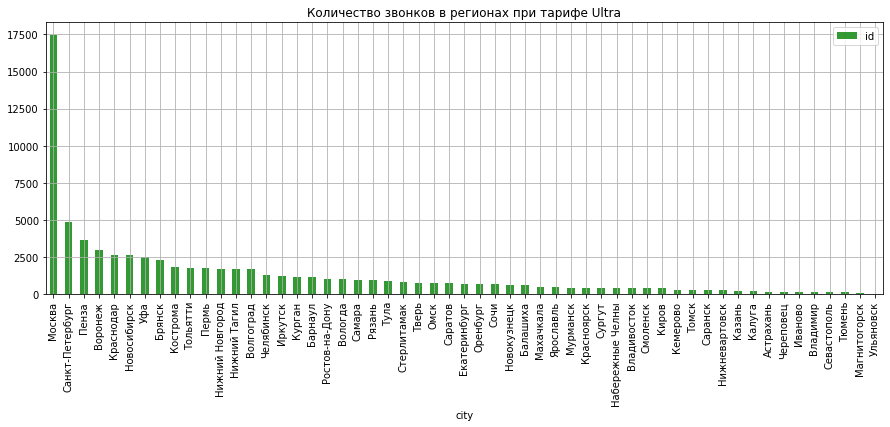

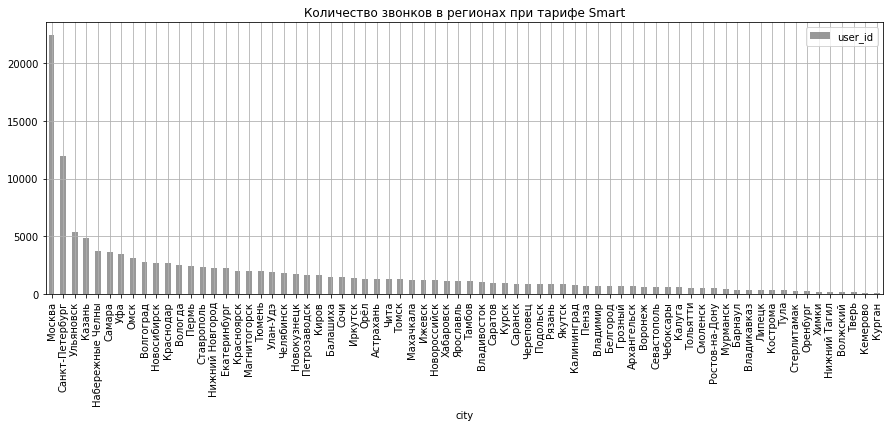

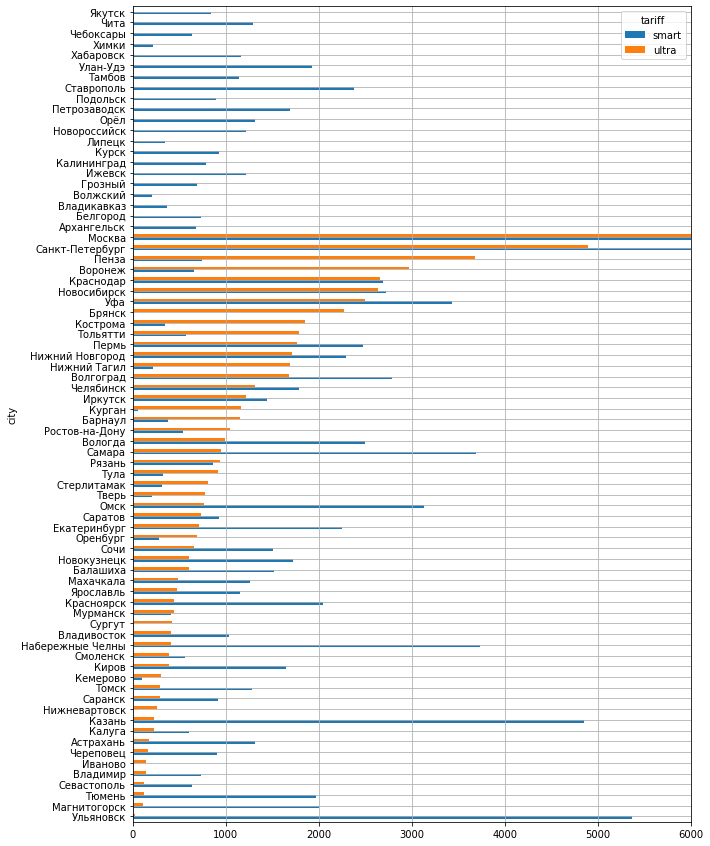

In [42]:
calls_and_users_ultra = calls_and_users.query('tariff == "ultra"')
calls_and_users_smart = calls_and_users.query('tariff == "smart"')

(calls_and_users_ultra
 .pivot_table(index='city',values='id',aggfunc='count')
 .sort_values(by='id',ascending=False)
 .plot(kind='bar', grid=True,\
       figsize=(15,5)\
       ,alpha=.8, color='green'\
       ,title='Количество звонков в регионах при тарифе Ultra')
)
(calls_and_users_smart
 .pivot_table(index='city',values='user_id',aggfunc='count')
 .sort_values(by='user_id',ascending=False)
 .plot(kind='bar', grid=True,\
       figsize=(15,5)\
       ,alpha=.8, color='grey'\
       ,title='Количество звонков в регионах при тарифе Smart')
)

#временная таблица для просмотра распределения городов и тарифных планов по количеству звонков
temp_pivot_0 = calls_and_users.pivot_table(index='city',columns='tariff',values='user_id',aggfunc='count')

(temp_pivot_0
 .sort_values(by='ultra', ascending=True)
 .plot(kind='barh', rot=0, figsize=(10,15),grid=True, xlim=[0,6000])
)
plt.show()
#calls_and_users_smart.plot(kind='bar', x=calls_and_users_smart.index, grid=True, figsize=(15,5))


##### Вывод
На графиках видно:
* есть города в которых присутствует только один тарифный план;
* Москва и Санкт-Петербург лидеры по количеству звонков на обоих тарифных планах и входят в топ абонентской базы.

---

##### Посмотрим в каких городах представлен только один план

---
## Комментарий от наставника

Интереcные наблюдения, молодец.

---

In [43]:
diff_city_ultra = list(set(calls_and_users_ultra.city.unique()) - set(calls_and_users_smart.city.unique()))
diff_city_smart = list(set(calls_and_users_smart.city.unique()) - set(calls_and_users_ultra.city.unique()))
diff_city = diff_city_ultra + diff_city_smart
print('Города в которых только тарифный план Smart:', ', '.join(diff_city_smart), '\n')

print('Города в которых только тарифный план Ultra:', ', '.join(diff_city_ultra), '\n')

print('Города в которых только один тарифный план:', ', '.join(diff_city), '\n')

Города в которых только тарифный план Smart: Владикавказ, Липецк, Якутск, Химки, Петрозаводск, Улан-Удэ, Калининград, Курск, Хабаровск, Чита, Орёл, Архангельск, Ставрополь, Тамбов, Волжский, Новороссийск, Ижевск, Грозный, Подольск, Чебоксары, Белгород 

Города в которых только тарифный план Ultra: Брянск, Иваново, Сургут, Нижневартовск 

Города в которых только один тарифный план: Брянск, Иваново, Сургут, Нижневартовск, Владикавказ, Липецк, Якутск, Химки, Петрозаводск, Улан-Удэ, Калининград, Курск, Хабаровск, Чита, Орёл, Архангельск, Ставрополь, Тамбов, Волжский, Новороссийск, Ижевск, Грозный, Подольск, Чебоксары, Белгород 



В вышеперечисленом списке указаны города, где присутствует только один тарифный план, для проведения анализа и понимания насколько эффективен тот или иной тариф сделаем новую таблицу, но в которой будут только города в которых присутствуют оба тарифных плана.

In [44]:
%%time

def mono_tariff(row):
    city = row.city
    if city in diff_city:
        return 'mono'
    else:
        return 'two'
calls_and_users['status_tariff'] = calls_and_users.apply(mono_tariff, axis = 1)
calls_and_users_mono = calls_and_users.query('status_tariff == "mono"')
calls_and_users = calls_and_users.query('status_tariff != "mono"')
    

CPU times: user 7.8 s, sys: 72 ms, total: 7.87 s
Wall time: 7.93 s


           duration           age
count  23781.000000  23781.000000
mean       7.260292     52.071317
std        5.608284     14.594720
min        1.000000     18.000000
25%        2.000000     45.000000
50%        6.000000     55.000000
75%       11.000000     64.000000
max       25.000000     75.000000
            duration            age
count  178148.000000  178148.000000
mean        7.288822      46.776136
std         5.620476      16.602813
min         1.000000      18.000000
25%         2.000000      32.000000
50%         6.000000      46.000000
75%        11.000000      62.000000
max        25.000000      75.000000


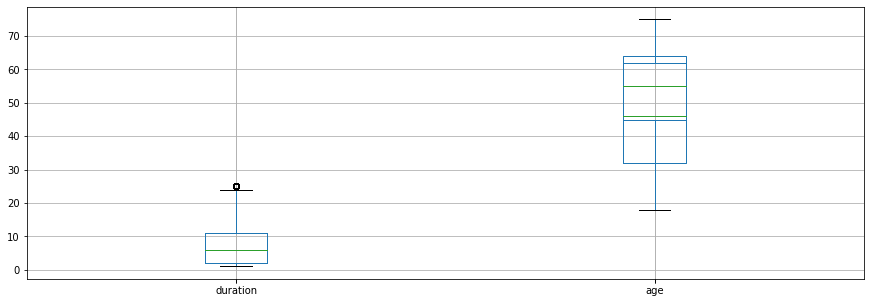

In [45]:
print(calls_and_users_mono[['duration', 'age']].describe())
print(calls_and_users[['duration', 'age']].describe())
calls_and_users_mono.boxplot(column=['duration', 'age'], figsize=(15,5))
calls_and_users.boxplot(column=['duration', 'age'], figsize=(15,5))
plt.show()

Между городами нет разницы в длительности, лишь только на 1м, 2м и 3м квантиле возраст отличается.

In [46]:
calls_and_users.corr()

,duration,user_id,month,age
duration,1.000000,-0.000819,-0.002095,-0.000606
user_id,-0.000819,1.000000,-0.020895,0.009172
month,-0.002095,-0.020895,1.000000,-0.004941
age,-0.000606,0.009172,-0.004941,1.000000


In [47]:
calls_and_users.head(2)

,id,call_date,duration,user_id,month,age,churn_date,city,reg_date,tariff,name,status,age_group,status_tariff
0,1000_0,2018-07-25,1.0,1000,7,52,2099-01-01,Краснодар,2018-05-25,ultra,Рафаил Верещагин,активен,пожилой,two
1,1000_1,2018-08-17,1.0,1000,8,52,2099-01-01,Краснодар,2018-05-25,ultra,Рафаил Верещагин,активен,пожилой,two


Стоит заметить, что объединить таблицы не получится, пока не избавимся от номера сессии "id", т.е. нужно сгруппировать все данные по пользователю и понять __частоту__ посещения ___в день, неделю, месяц___ и добавить соответствующие столбцы. Соответственно это нужно провести для всех таблиц.

In [48]:
calls.head(2)

,id,call_date,duration,user_id,year,month,day
0,1000_0,2018-07-25,1.0,1000,2018,7,2
1,1000_1,2018-08-17,1.0,1000,2018,8,4


In [49]:
internet.head(2)

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000


In [50]:
messages.head(2)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000


In [51]:
internet['year'] = internet.session_date.dt.year
internet['month'] = internet.session_date.dt.month
internet['day'] = internet.session_date.dt.day

messages['year'] = messages.message_date.dt.year
messages['month'] = messages.message_date.dt.month
messages['day'] = messages.message_date.dt.day


In [52]:
temp_pivot_calls = calls

med = temp_pivot_calls['duration'].median()

temp_pivot_calls.loc[temp_pivot_calls['duration']==0, 'duration'] = med

temp_pivot_calls = temp_pivot_calls.pivot_table(index='user_id',columns='month',values = ['duration'],aggfunc=['mean'])

temp_pivot_calls.columns = ['1','2','3','4','5','6','7','8','9','10','11','12']

       
def func(row):
    return row.count()
  
        
temp_pivot_calls['active_calls_month'] = temp_pivot_calls.apply(func, axis=1)
temp_pivot_calls = temp_pivot_calls.fillna(0)

def func(row):
    return row.sum()/row.active_calls_month

temp_pivot_calls['mean_calls_month'] = temp_pivot_calls.apply(func, axis=1)
temp_pivot_calls.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,1,2,3,4,5,6,7,8,9,10,11,12,active_calls_month,mean_calls_month
user_id,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,7.454545,4.348837,7.361702,8.038462,8.241379,6.368421,8.000000,7.413043,8,8.153299
1001,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.525424,6.825397,2,8.175410
1002,0.0,0.0,0.0,0.0,0.000000,7.866667,7.680000,7.000000,6.027778,6.696970,7.812500,7.333333,7,8.202464
1003,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,7.127273,7.388060,8.018519,7.166667,7.611111,5,8.462326
1004,0.0,0.0,0.0,0.0,4.111111,5.709677,6.227273,7.263158,4.807692,5.275862,6.368421,6.476190,8,6.779923


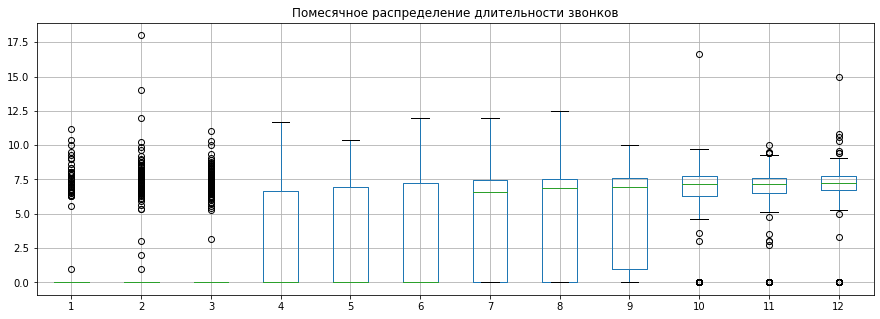

In [53]:
temp_pivot_calls.loc[:,['1','2','3','4','5','6','7','8','9','10','11','12']].boxplot();
title_boxplot = 'Помесячное распределение длительности звонков'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()

In [54]:
temp_pivot_messages = messages.pivot_table(index='user_id'\
                                     ,columns='month'\
                                     ,values = ['id']\
                                     ,aggfunc=['count']\
                                    )
temp_pivot_messages.columns = ['1','2','3','4','5','6','7','8','9','10','11','12']
      
def func(row):
    return row.count()
        
temp_pivot_messages['active_message_month'] = temp_pivot_messages.apply(func, axis=1)

def func(row):
    return row.count()

temp_pivot_messages['mean_messages_month'] = temp_pivot_messages.apply(func, axis=1)
temp_pivot_messages.head()

,1,2,3,4,5,6,7,8,9,10,11,12,active_message_month,mean_messages_month
user_id,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,8,9
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0,7,8
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0,5,6
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0,8,9
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0,12,13


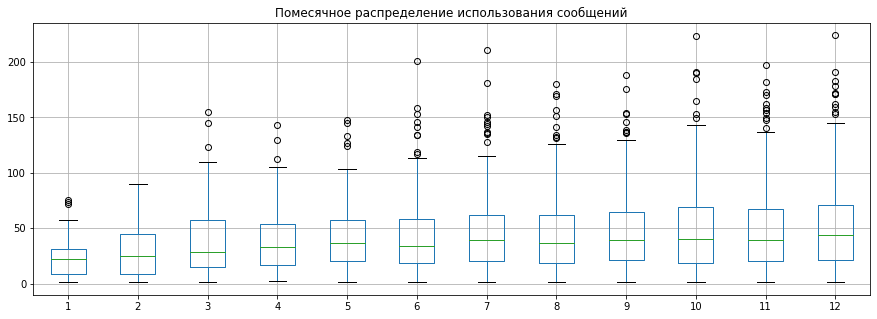

In [55]:
temp_pivot_messages.loc[:,['1','2','3','4','5','6','7','8','9','10','11','12']].boxplot();
title_boxplot = 'Помесячное распределение использования сообщений'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()

In [56]:
temp_pivot_internet = internet.pivot_table(index='user_id'\
                                     ,columns='month'\
                                     ,values = ['mb_used']\
                                     ,aggfunc=['median']\
                                    )
temp_pivot_internet.columns = ['1','2','3','4','5','6','7','8','9','10','11','12']
temp_pivot_internet

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,545.0,460.0,519.0,477.0,547.0,567.0,613.5,560.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.0,347.0
1002,NaN,NaN,NaN,NaN,NaN,330.5,253.5,323.0,224.0,323.5,304.0,281.5
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,585.0,539.5,473.0,531.0,483.0
1004,NaN,NaN,NaN,NaN,589.0,476.0,691.0,506.0,334.0,492.0,450.0,455.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,546.0,489.0,501.0,556.0,530.0
1496,280.5,347.5,276.5,277.0,279.0,263.0,298.5,299.0,357.0,293.0,251.0,250.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361.0,309.0,412.0


In [57]:
def func(row):
    return row.count()
       
temp_pivot_internet['active_internet_month'] = temp_pivot_internet.apply(func, axis=1)

temp_pivot_internet = temp_pivot_internet.fillna(0)

def func(row):
    return row.sum()/row.active_internet_month

temp_pivot_internet['mean_internet_month'] = temp_pivot_internet.apply(func, axis=1)
#print(temp_pivot_internet.info())
temp_pivot_internet.head()

,1,2,3,4,5,6,7,8,9,10,11,12,active_internet_month,mean_internet_month
user_id,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,545.0,460.0,519.0,477.0,547.0,567.0,613.5,560.0,8,537.062500
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.0,347.0,2,330.500000
1002,0.0,0.0,0.0,0.0,0.0,330.5,253.5,323.0,224.0,323.5,304.0,281.5,7,292.428571
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,585.0,539.5,473.0,531.0,483.0,5,523.300000
1004,0.0,0.0,0.0,0.0,589.0,476.0,691.0,506.0,334.0,492.0,450.0,455.5,8,500.187500


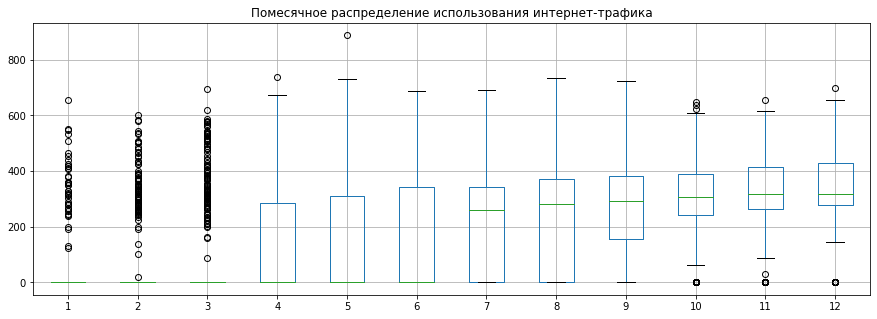

In [58]:
temp_pivot_internet.loc[:,['1','2','3','4','5','6','7','8','9','10','11','12']].boxplot();
title_boxplot = 'Помесячное распределение использования интернет-трафика'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()

1,2,3 месяца сильный разброс значений по звонкам/интернету, в использовании сообщений такой статистики не наблюдается, если воспользоваашись boxplot удалить пользователей создающих выбросы можно будет получить __репрезентативную__ выборку.

---
Сведём основные производные средние данные по использованию услуг на основании созданных ранее таблиц

In [59]:
stat = pd.merge(temp_pivot_internet.loc[:,['active_internet_month','mean_internet_month']],\
               temp_pivot_calls.loc[:,['active_calls_month','mean_calls_month']]\
               ,how='outer'\
               ,left_index=True, right_index=True\
              )
stat = pd.merge(stat,\
               temp_pivot_messages.loc[:,['active_message_month','mean_messages_month']]\
               ,how='outer'\
               ,left_index=True, right_index=True\
              )               

In [60]:
stat.fillna(0, inplace=True)
stat.head()

,active_internet_month,mean_internet_month,active_calls_month,mean_calls_month,active_message_month,mean_messages_month
user_id,,,,,,
1000,8.0,537.062500,8.0,8.153299,8.0,9.0
1001,2.0,330.500000,2.0,8.175410,0.0,0.0
1002,7.0,292.428571,7.0,8.202464,7.0,8.0
1003,5.0,523.300000,5.0,8.462326,5.0,6.0
1004,8.0,500.187500,8.0,6.779923,8.0,9.0


In [61]:
#Проверим основную информацию по таблице
stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 1000 to 1499
Data columns (total 6 columns):
active_internet_month    498 non-null float64
mean_internet_month      498 non-null float64
active_calls_month       498 non-null float64
mean_calls_month         498 non-null float64
active_message_month     498 non-null float64
mean_messages_month      498 non-null float64
dtypes: float64(6)
memory usage: 27.2 KB


In [62]:
calls_and_users_new = calls_and_users.loc[:,['user_id', 'age','city', 'reg_date',\
                       'tariff', 'name', 'status', 'age_group','status_tariff']]
calls_and_users_new = calls_and_users_new.drop_duplicates().reset_index(drop=True)
calls_and_users_new

,user_id,age,city,reg_date,tariff,name,status,age_group,status_tariff
0,1000,52,Краснодар,2018-05-25,ultra,Рафаил Верещагин,активен,пожилой,two
1,1001,41,Москва,2018-11-01,smart,Иван Ежов,активен,средний,two
2,1002,59,Стерлитамак,2018-06-17,smart,Евгений Абрамович,активен,пожилой,two
3,1003,23,Москва,2018-08-17,ultra,Белла Белякова,активен,молодой,two
4,1004,68,Новокузнецк,2018-05-14,ultra,Татьяна Авдеенко,активен,преклонный,two
...,...,...,...,...,...,...,...,...,...
424,1494,62,Омск,2018-08-17,smart,Ренат Андропов,активен,преклонный,two
425,1495,65,Иркутск,2018-08-28,ultra,Авксентий Фокин,активен,преклонный,two
426,1496,36,Вологда,2018-01-27,smart,Трифон Блохин,активен,средний,two
427,1497,32,Челябинск,2018-10-09,smart,Каролина Агеева,активен,средний,two


In [63]:
stat = pd.merge(stat,\
               calls_and_users_new\
               ,on='user_id'\
               ,how='inner'\
               #,left_index=True, right_index=False\
              )
stat

,user_id,active_internet_month,mean_internet_month,active_calls_month,mean_calls_month,active_message_month,mean_messages_month,age,city,reg_date,tariff,name,status,age_group,status_tariff
0,1000,8.0,537.062500,8.0,8.153299,8.0,9.0,52,Краснодар,2018-05-25,ultra,Рафаил Верещагин,активен,пожилой,two
1,1001,2.0,330.500000,2.0,8.175410,0.0,0.0,41,Москва,2018-11-01,smart,Иван Ежов,активен,средний,two
2,1002,7.0,292.428571,7.0,8.202464,7.0,8.0,59,Стерлитамак,2018-06-17,smart,Евгений Абрамович,активен,пожилой,two
3,1003,5.0,523.300000,5.0,8.462326,5.0,6.0,23,Москва,2018-08-17,ultra,Белла Белякова,активен,молодой,two
4,1004,8.0,500.187500,8.0,6.779923,8.0,9.0,68,Новокузнецк,2018-05-14,ultra,Татьяна Авдеенко,активен,преклонный,two
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,1494,5.0,320.300000,5.0,8.282539,0.0,0.0,62,Омск,2018-08-17,smart,Ренат Андропов,активен,преклонный,two
425,1495,5.0,525.400000,5.0,7.881939,5.0,6.0,65,Иркутск,2018-08-28,ultra,Авксентий Фокин,активен,преклонный,two
426,1496,12.0,290.333333,12.0,8.389556,12.0,13.0,36,Вологда,2018-01-27,smart,Трифон Блохин,активен,средний,two
427,1497,3.0,361.666667,3.0,8.091754,3.0,4.0,32,Челябинск,2018-10-09,smart,Каролина Агеева,активен,средний,two


Проверим корреляционные зависимости

In [64]:
corr_stat = stat.corr()
corr_stat

,user_id,active_internet_month,mean_internet_month,active_calls_month,mean_calls_month,active_message_month,mean_messages_month,age
user_id,1.000000,0.024395,0.080304,0.024922,-0.014820,0.071900,0.073914,-0.008493
active_internet_month,0.024395,1.000000,0.062634,0.993247,-0.020697,0.712945,0.670715,-0.025992
mean_internet_month,0.080304,0.062634,1.000000,0.043339,-0.025982,-0.030488,-0.034666,0.020346
active_calls_month,0.024922,0.993247,0.043339,1.000000,-0.029123,0.719758,0.677350,-0.026051
mean_calls_month,-0.014820,-0.020697,-0.025982,-0.029123,1.000000,-0.017029,-0.018143,-0.003671
active_message_month,0.071900,0.712945,-0.030488,0.719758,-0.017029,1.000000,0.997439,-0.025872
mean_messages_month,0.073914,0.670715,-0.034666,0.677350,-0.018143,0.997439,1.000000,-0.027210
age,-0.008493,-0.025992,0.020346,-0.026051,-0.003671,-0.025872,-0.027210,1.000000


Что и следовало ожидать: помесячные активности потребления интернет трафика/звонков/сообщений коррелируют по Пирсону на уровне 99,9% - это означение показывает, что большинство пользователей в месяц пользуются всем спектром услуг, но есть и такие, которых меньше 0,1%, которые пользуются только звонками или сообщениями или интернетом.

---

Сложно пользоваться только числовыми данными, сделаем визуализацию

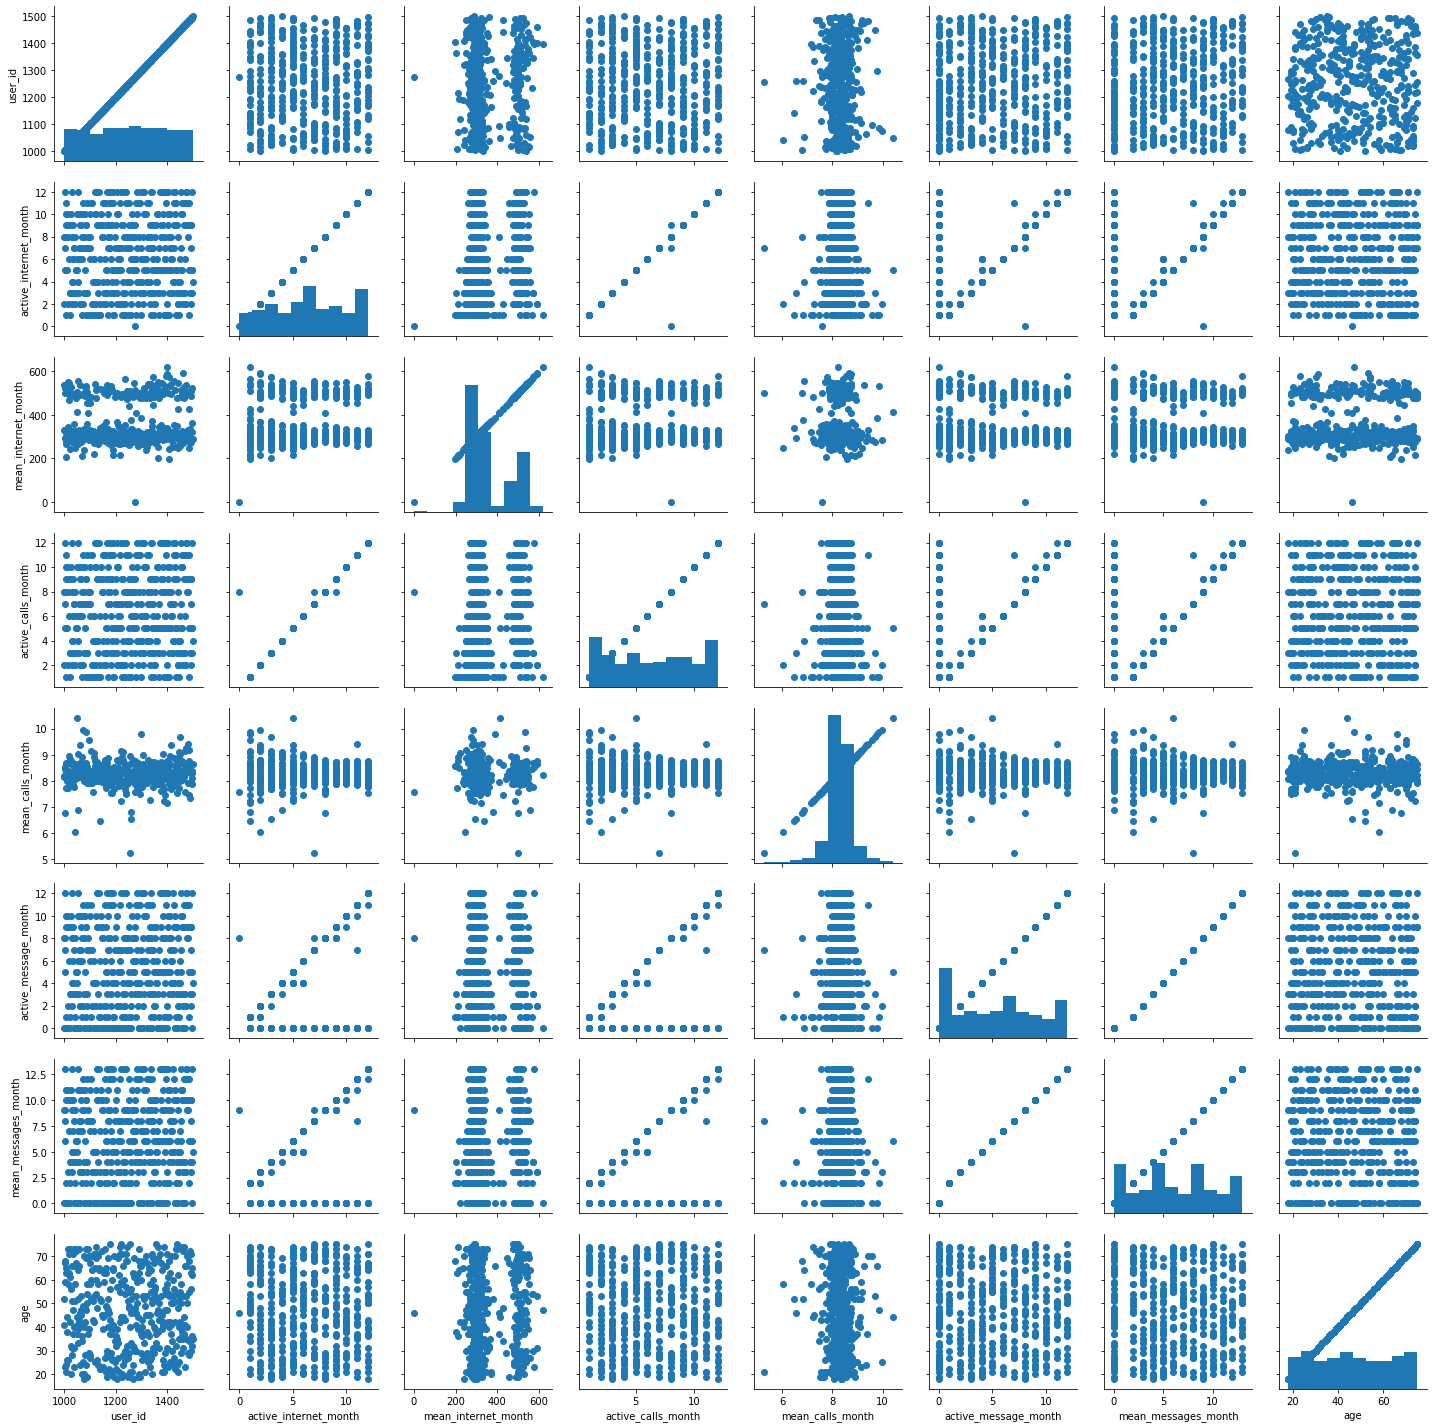

In [65]:
g = sns.PairGrid(stat)
g.map_diag(plt.hist)
g.map(plt.scatter);
plt.show()

#### Вывод
На графиках зависимости типа:
* Возраст - Среднемесячное использование интернет-трафика
* Среднемесячное использование интернет-трафика - Среднемесячная длительность звонков
видно выделение 2-х нормальных распределений. Это связано с тем, что у нас два тарифа и расход пропроционален тарифному плану, все что выходит за пределы связано с перерасходом. Также неудивительно, что сообщениями пользуются не пропроционально тарифу и связано это вероятнее всего с тем, что существуют месенеджеры, которомы пользоваться удобнее и они польностью бесплатные. Сообщения как вид услуг представляет собой больше дань прошлому и большой пакет сообщений неактуален большиству.

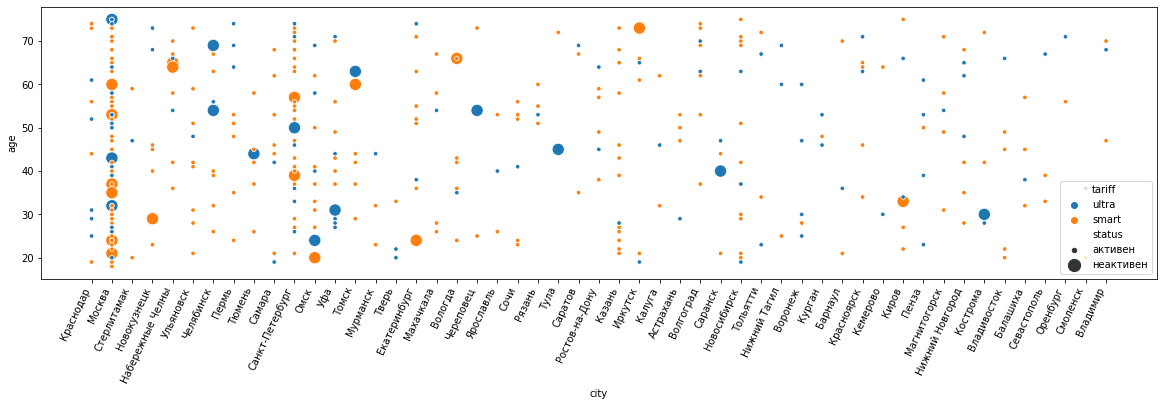

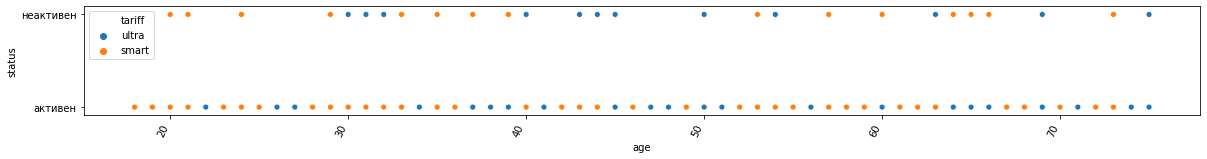

In [66]:
#stat.plot(x='user_id',y='age',style='o',hue='tariff')
plt.figure(figsize=(20,5))
plt.xticks(rotation=65, horizontalalignment='right')
#plt.xlim(0,7000)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="city", y="age"\
                     ,hue="tariff"\
                     ,size="status"\
                     #,palette=cmap\
                     ,data=stat\
                     ,sizes=(150, 20)
                    )
plt.show()
plt.figure(figsize=(20,2))
plt.xticks(rotation=65, horizontalalignment='right')
sns.scatterplot(y="status", x="age"\
                     ,hue="tariff"\
                     #,size="status"\
                     #,palette=cmap\
                     ,data=stat#.loc[stat['city'].isin(['Москва'\
                                                       #,'Санкт-Петербург'\
                               #                       ])]\
                     ,sizes=(150)
                    )
plt.show()

Максимально высокая плотность заполнения возрастными групами в Москве и Санкт-петербурге, что и следовало ожидать, это не противоречит нашим первоначальным выводам и гипотезам.

In [67]:
stat.head()

,user_id,active_internet_month,mean_internet_month,active_calls_month,mean_calls_month,active_message_month,mean_messages_month,age,city,reg_date,tariff,name,status,age_group,status_tariff
0,1000,8.0,537.062500,8.0,8.153299,8.0,9.0,52,Краснодар,2018-05-25,ultra,Рафаил Верещагин,активен,пожилой,two
1,1001,2.0,330.500000,2.0,8.175410,0.0,0.0,41,Москва,2018-11-01,smart,Иван Ежов,активен,средний,two
2,1002,7.0,292.428571,7.0,8.202464,7.0,8.0,59,Стерлитамак,2018-06-17,smart,Евгений Абрамович,активен,пожилой,two
3,1003,5.0,523.300000,5.0,8.462326,5.0,6.0,23,Москва,2018-08-17,ultra,Белла Белякова,активен,молодой,two
4,1004,8.0,500.187500,8.0,6.779923,8.0,9.0,68,Новокузнецк,2018-05-14,ultra,Татьяна Авдеенко,активен,преклонный,two


In [68]:
#stat.loc[stat['city'].isin(['Москва', 'Санкт-Петербург'])]
stat = stat.reset_index()
del stat['index']


In [69]:
age=pd.qcut(stat['age'],2)
temp_stat = stat.pivot_table(\
                index = ['tariff',age,'city']\
                ,values  = 'user_id'\
                ,aggfunc = ['count']).unstack()
#temp_stat.columns = column
temp_stat



count                                        \
                        user_id                                         
city                  Астрахань Балашиха Барнаул Владивосток Владимир   
tariff age                                                              
smart  (17.999, 46.0]       NaN      3.0     1.0         3.0      NaN   
       (46.0, 75.0]         3.0      1.0     1.0         1.0      2.0   
ultra  (17.999, 46.0]       1.0      1.0     1.0         NaN      NaN   
       (46.0, 75.0]         NaN      NaN     NaN         1.0      1.0   

                                                                      ...  \
                                                                      ...   
city                  Волгоград Вологда Воронеж Екатеринбург Иркутск  ...   
tariff age                                                            ...   
smart  (17.999, 46.0]       1.0     4.0     1.0          4.0     1.0  ...   
       (46.0, 75.0]         5.0     2.0     NaN          5.0     3.0  ...   
ultra  (17.999, 46.0]       NaN     1.0     2.0          1.0     1.0  ...   
       (46.0, 75.0]         2.0     NaN     3.0          1.0     1.0  ...   

                                                                       \
                                                                        
city                  Тверь Тольятти Томск Тула Тюмень Ульяновск  Уфа   
tariff age                                                              
smart  (17.999, 46.0]   1.0      1.0   4.0  NaN    4.0       6.0  3.0   
       (46.0, 75.0]     NaN      1.0   1.0  1.0    1.0       4.0  3.0   
ultra  (17.999, 46.0]   2.0      1.0   NaN  1.0    1.0       NaN  5.0   
       (46.0, 75.0]     NaN      1.0   1.0  NaN    NaN       1.0  1.0   

                                                     
                                                     
city                  Челябинск Череповец Ярославль  
tariff age                                           
smart  (17.999, 46.0]       4.0       1.0       1.0  
       (46.0, 75.0]         2.0       1.0       1.0  
ultra  (17.999, 46.0]       NaN       NaN       1.0  
       (46.0, 75.0]         3.0       1.0       NaN  

[4 rows x 51 columns]

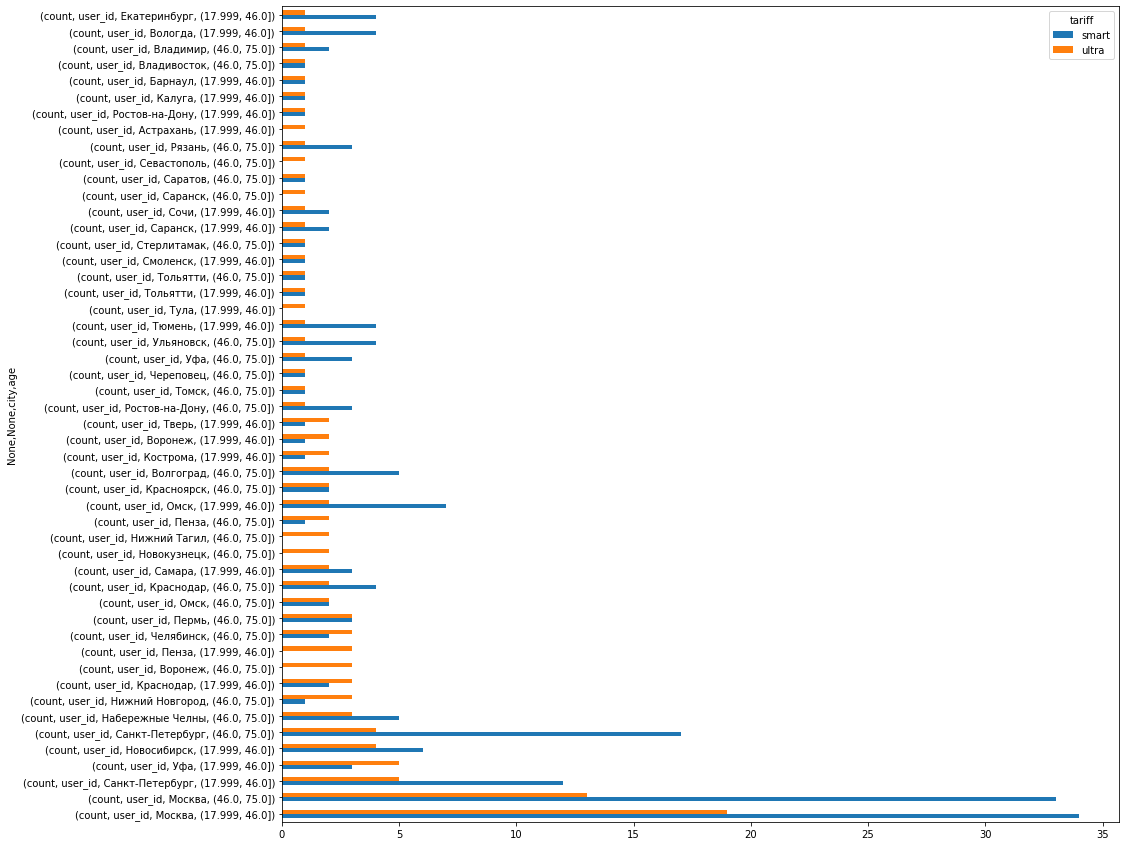

In [70]:
temp_stat.unstack().unstack().unstack().sort_values(by=('ultra'), ascending=False).head(50).plot(kind='barh', figsize=(15,15));

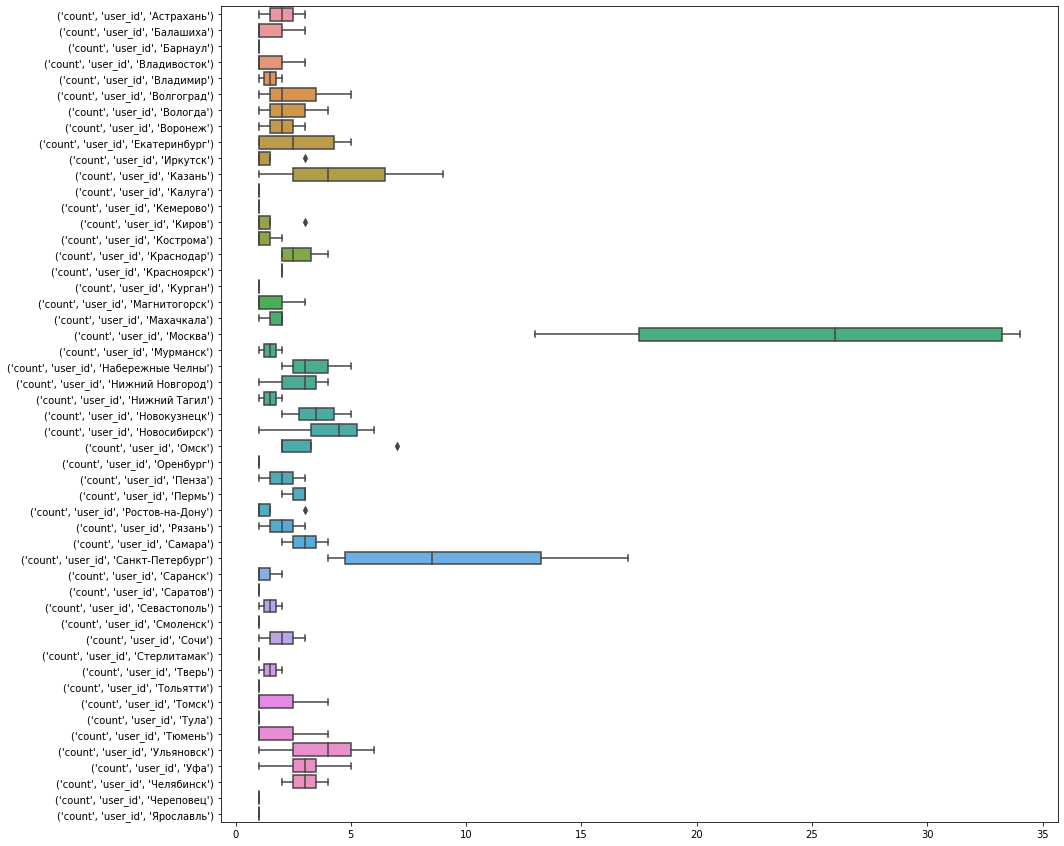

In [71]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(data=temp_stat, orient = 'h')

#### Вывод
На основании анализа двух последних графиков, можно сказать, что среднее время разговора совершенно разное между городами, если в Санкт-Петербурге среднее 9 мин, то в Москве - 27 мин,  а в периферийных городах менее 5 минут. Одной из гипотез может быть, что Москва - столица и здесь активно проявляются деловые коммуникации, в сравнении с другими городами, где деловая активность мала, а также мало количественное моотношение. На основании предпоследнего графика можно сделать вывод, что не все возрастные группы представленны в городах, вернее в выборке не хватает данных по возрастной абонентской базе, поэтому нельзя точно говорить о влиянии возраста на длительности звонков.

In [72]:
tariffs

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [73]:
new_stat = pd.merge(stat, tariffs, left_on = 'tariff', right_on ='tariff_name', how='outer')
del new_stat['reg_date']
del new_stat['age_group']
new_stat.dropna()
new_stat.drop_duplicates().reset_index(inplace=True)
new_stat.head()

,user_id,active_internet_month,mean_internet_month,active_calls_month,mean_calls_month,active_message_month,mean_messages_month,age,city,tariff,...,status,status_tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,8.0,537.062500,8.0,8.153299,8.0,9.0,52,Краснодар,ultra,...,активен,two,1000,30720,3000,1950,150,1,1,ultra
1,1003,5.0,523.300000,5.0,8.462326,5.0,6.0,23,Москва,ultra,...,активен,two,1000,30720,3000,1950,150,1,1,ultra
2,1004,8.0,500.187500,8.0,6.779923,8.0,9.0,68,Новокузнецк,ultra,...,активен,two,1000,30720,3000,1950,150,1,1,ultra
3,1016,2.0,550.750000,2.0,7.718750,2.0,3.0,58,Омск,ultra,...,активен,two,1000,30720,3000,1950,150,1,1,ultra
4,1018,9.0,548.555556,9.0,8.205676,9.0,10.0,71,Уфа,ultra,...,активен,two,1000,30720,3000,1950,150,1,1,ultra


### Анализ
##### Задания:
1. Поясните, какие ошибки вы нашли и как их исправили. Обратите внимание, что у большого количества звонков длительность — 0.0 минут. Это проблема в данных, нужна предобработка.
##### Реализация:
    * *первый вариант: удалить проблемные данные, тем самым получив валидную выборку и провести анализ;*
    * *второй вариант: заменить проблемные данные с нулевой длительностью на 1 секунду, т.к. возможно пользователи совершали очень короткие звонки, ошибочные или какое то приложение делало подобного вида прозвон, но с точки зрения фиксации звонка, он должен быть округлён в большую сторону, а фиксация на порядке минут, поэтому округление до 1 минуты;*
    * *третий вариант: возможно может сильно сместить среднее по длительности, т.к доля нулевых звонков порядка 19,6%, в данном предложении сделать замену среднего на основании медианного значения;*

##### Моя реализация
    *второй вариант: заменить проблемные данные с нулевой длительностью на 1 секунду
---    
    
2. Посчитайте для каждого пользователя:
    * количество сделанных звонков и израсходованных минут разговора по месяцам;
    * количество отправленных сообщений по месяцам;
    * объем израсходованного интернет-трафика по месяцам;
    * помесячную выручку с каждого пользователя 
        * (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [74]:
(30000-26785)//100

32

In [75]:
new_stat['calls_per_month'] = new_stat.mean_calls_month * 30
new_stat['message_per_month'] = new_stat.mean_messages_month * 30
new_stat['internet_per_month'] = new_stat.mean_internet_month * 30
#удалим повторяющийся столбец
#del new_stat['tariff_name']
#Снятие ограничений на вывод
pd.set_option('display.max_columns', 30)
#pd.set_option('display.max_rows', None)

new_stat['delta_calls'] = (new_stat.minutes_included - new_stat.calls_per_month)/new_stat.minutes_included
new_stat['delta_internet'] = (new_stat.mg_per_month_included - new_stat.internet_per_month)/new_stat.mg_per_month_included
new_stat['delta_messages'] = (new_stat.messages_included - new_stat.message_per_month)/new_stat.messages_included

def cost_over_call(cost_per_min, all_min_tariff, spent_min):
    '''
    функция для подсчёта перерасхода по звонкам
    '''
    result = (spent_min - all_min_tariff) * cost_per_min
    return result
  
def cost_over_int(cost_per_100mb, all_mb_tariff, spent_mb):
    '''
    функция для подсчёта перерасхода по интернет-трафику
    '''
    result = (spent_mb - all_mb_tariff)//100 * cost_per_100mb
    return result

def cost_over_mess(cost_per_mess, all_mess_tariff, spent_mess):
    '''
    функция для подсчёта перерасхода по сообщениям
    '''
    result = (spent_mess - all_mess_tariff) * cost_per_mess
    return result

def overrun(row):
    '''
    подсчёт суммарного перерасхода в рублях
    '''
    #сумма перерасхода
    sum_over = 0
    #показатель перерасхода по звонкам
    over_call=row.delta_calls
    #показатель перерасхода по интернету
    over_internet=row.delta_internet
    #показатель перерасхода по сообщениям
    over_message=row.delta_messages
    
    #наименования переменных для звонков
    cost_per_min = row.rub_per_minute
    all_min_tariff = row.minutes_included
    spent_min = row.calls_per_month
    
    #наименования переменных для интернета
    cost_per_100mb = row.rub_per_gb
    all_mb_tariff = row.internet_per_month
    spent_mb = row.internet_per_month
    
    #наименования переменных для сообщений
    cost_per_mess = row.rub_per_message
    all_mess_tariff = row.messages_included
    spent_mess = row.message_per_month
    
    if (over_call<0):
        sum_over = cost_over_call(cost_per_min, all_min_tariff, spent_min)
    if (over_internet<0):
        sum_over += cost_over_int(cost_per_100mb, all_mb_tariff, spent_mb)
    if (over_message<0):
        sum_over += cost_over_mess(cost_per_mess, all_mess_tariff, spent_mess)
    return sum_over
        
    
new_stat['overrun_rub'] = new_stat.apply(overrun, axis=1)
new_stat['delta_over'] = ((new_stat['overrun_rub'] - new_stat['rub_monthly_fee'])/new_stat['rub_monthly_fee'])+1
new_stat['all_cost'] = new_stat['overrun_rub'] + new_stat.rub_monthly_fee
#new_stat[new_stat['new_stat'] > 0].head()

In [76]:
new_stat[new_stat['overrun_rub'] > 0].head()

,user_id,active_internet_month,mean_internet_month,active_calls_month,mean_calls_month,active_message_month,mean_messages_month,age,city,tariff,name,status,status_tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,calls_per_month,message_per_month,internet_per_month,delta_calls,delta_internet,delta_messages,overrun_rub,delta_over,all_cost
137,1002,7.0,292.428571,7.0,8.202464,7.0,8.0,59,Стерлитамак,smart,Евгений Абрамович,активен,two,50,15360,500,550,200,3,3,smart,246.073918,240.0,8772.857143,0.507852,0.428850,-3.8,570.0,1.036364,1120.0
138,1005,12.0,326.458333,12.0,8.512471,12.0,13.0,67,Набережные Челны,smart,Афанасий Горлов,активен,two,50,15360,500,550,200,3,3,smart,255.374122,390.0,9793.750000,0.489252,0.362386,-6.8,1020.0,1.854545,1570.0
140,1007,9.0,265.555556,9.0,8.303827,9.0,10.0,65,Москва,smart,Юна Березина,активен,two,50,15360,500,550,200,3,3,smart,249.114803,300.0,7966.666667,0.501770,0.481337,-5.0,750.0,1.363636,1300.0
141,1008,1.0,207.000000,1.0,7.730769,1.0,2.0,63,Челябинск,smart,Рустэм Пономарёв,активен,two,50,15360,500,550,200,3,3,smart,231.923077,60.0,6210.000000,0.536154,0.595703,-0.2,30.0,0.054545,580.0
142,1009,10.0,315.700000,10.0,8.701177,10.0,11.0,24,Пермь,smart,Василиса Блинова,активен,two,50,15360,500,550,200,3,3,smart,261.035324,330.0,9471.000000,0.477929,0.383398,-5.6,840.0,1.527273,1390.0


In [77]:
new_stat[(new_stat['overrun_rub'] > 0)].sort_values(by='overrun_rub',ascending=False).head()

,user_id,active_internet_month,mean_internet_month,active_calls_month,mean_calls_month,active_message_month,mean_messages_month,age,city,tariff,name,status,status_tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,calls_per_month,message_per_month,internet_per_month,delta_calls,delta_internet,delta_messages,overrun_rub,delta_over,all_cost
170,1055,12.0,321.791667,12.0,8.525642,12.0,13.0,39,Казань,smart,Луиза Березина,активен,two,50,15360,500,550,200,3,3,smart,255.769256,390.0,9653.75,0.488461,0.371501,-6.8,1020.0,1.854545,1570.0
273,1227,12.0,293.416667,12.0,8.426623,12.0,13.0,66,Санкт-Петербург,smart,Раиса Калинина,активен,two,50,15360,500,550,200,3,3,smart,252.798705,390.0,8802.50,0.494403,0.426921,-6.8,1020.0,1.854545,1570.0
385,1423,12.0,267.083333,12.0,8.175825,12.0,13.0,50,Астрахань,smart,Леон Силин,активен,two,50,15360,500,550,200,3,3,smart,245.274762,390.0,8012.50,0.509450,0.478353,-6.8,1020.0,1.854545,1570.0
320,1299,12.0,313.541667,12.0,8.379864,12.0,13.0,37,Уфа,smart,Мариетта Симонова,активен,two,50,15360,500,550,200,3,3,smart,251.395913,390.0,9406.25,0.497208,0.387614,-6.8,1020.0,1.854545,1570.0
282,1238,12.0,293.625000,12.0,7.539659,12.0,13.0,57,Ростов-на-Дону,smart,Радислав Наумов,активен,two,50,15360,500,550,200,3,3,smart,226.189770,390.0,8808.75,0.547620,0.426514,-6.8,1020.0,1.854545,1570.0


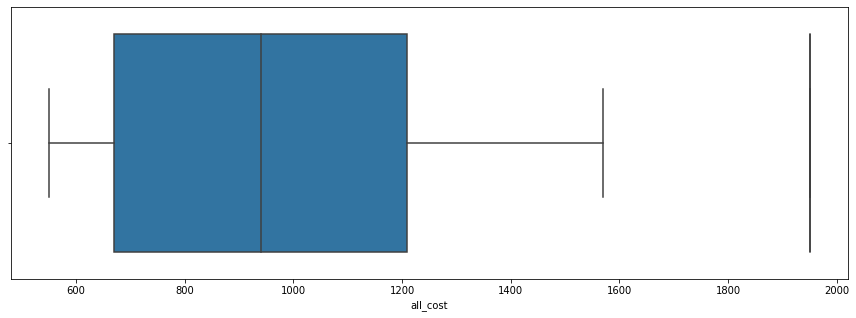

In [78]:
sns.boxplot(new_stat[new_stat['tariff'] == 'smart']['all_cost'])
sns.boxplot(new_stat[new_stat['tariff'] == 'ultra']['all_cost'])
plt.show()

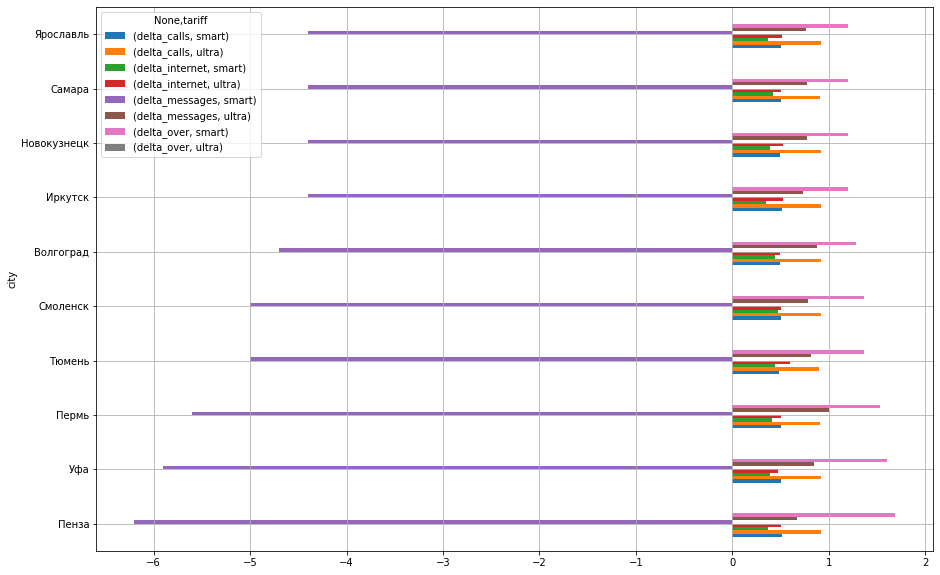

In [79]:
(new_stat
 .loc[:,['user_id','city','tariff','delta_calls','delta_internet','delta_messages','delta_over']]
 .pivot_table(index='city',\
              columns = 'tariff',\
              values=['delta_calls','delta_internet','delta_messages','delta_over'],\
              aggfunc='median')
 .sort_values(by=('delta_over','smart'),ascending=False)
 .head(10)
 .plot(kind='barh', grid=True, figsize=(15,10))
);

Перерасход по сообщениям космический. Топ3 городов, которым не хватает пакета: Пенза, Уфа, Пермь. Сообщения не позволяют взглянуть график адекватно, поэтому избавимся от них. 50 - это крайне мало, вот если появится оператор, котлорый предложит в своём пакете больший объём сообщений, то пользователи от него уйдут от старого.

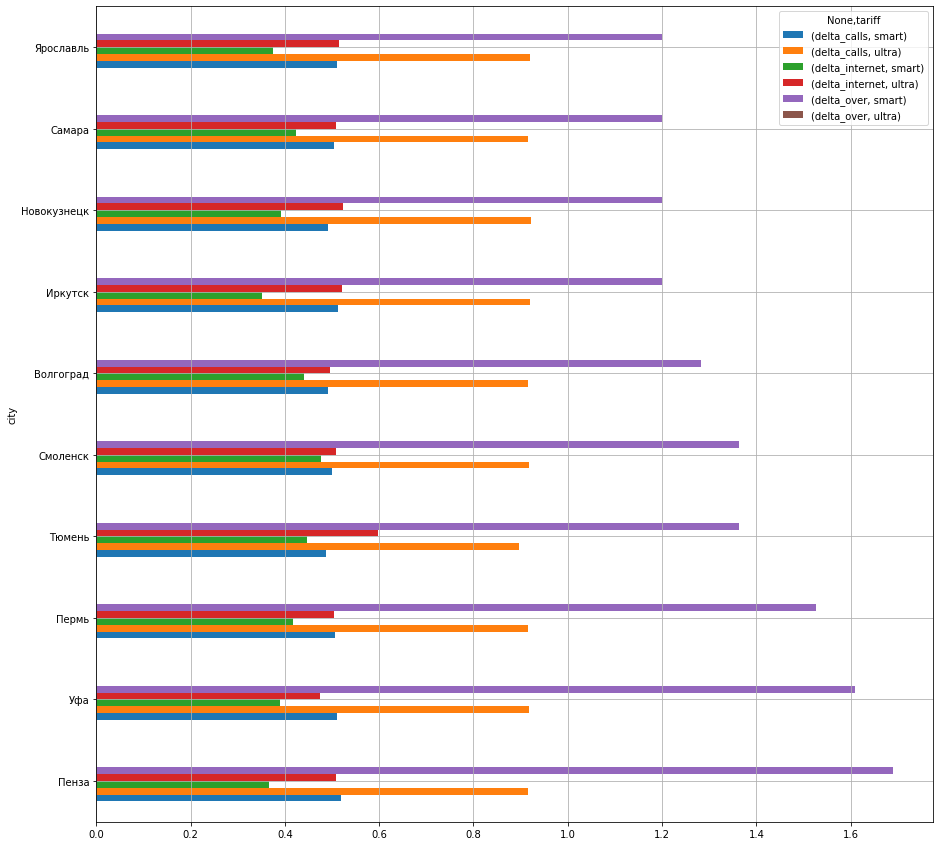

In [80]:
(new_stat
 .loc[:,['user_id','city','tariff','delta_calls','delta_internet','delta_messages','delta_over']]
 .pivot_table(index='city',\
              columns = 'tariff',\
              values=['delta_calls','delta_internet','delta_over'],\
              aggfunc='median')
 .sort_values(by=('delta_over','smart'),ascending=False)
 .head(10)
 .plot(kind='barh'\
       , grid=True\
       , figsize=(15,15)\
      )
);

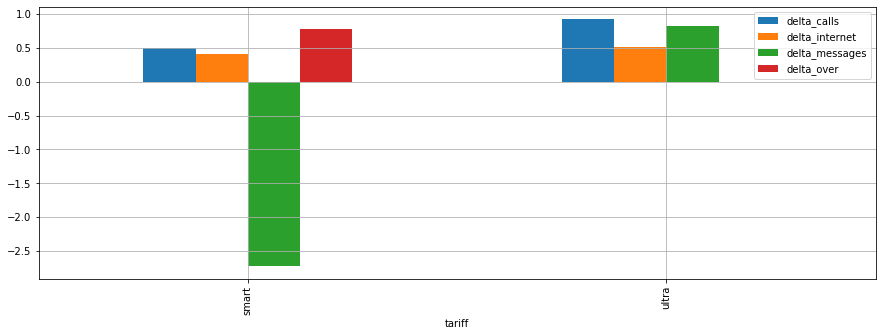

In [81]:
(new_stat
 .loc[:,['user_id','city','tariff','delta_calls','delta_internet','delta_messages','delta_over']]
 .pivot_table(index='tariff', values=['delta_calls','delta_internet','delta_messages','delta_over'],aggfunc='mean')
 .plot(kind='bar', grid=True)
);

Данная столбчатая диаграмма илюстрирует, что в тарифе Смарт очень мало сообщений в пакете и это правда 50 и 1000 - совсем разные цифры, а в тарифе Ультра таких проблем с сообщениями не наблюдается. По звонкам, сообщениям и интенету наоборот наблюдается переизбыток, что означает, что людей вполне устраивает их тариф с точки зрения объёма услуг. Данный график прекрасно соотносится с предыдущем.

In [82]:
print('Количество пользователей с перерасходом на основании средних величин -',new_stat[new_stat['overrun_rub'] > 0].count().max())
print('Количество пользователей с перерасходом хотя бы по одному показателю', new_stat[(new_stat['delta_calls'] < 0)|(new_stat['delta_internet'] < 0)|(new_stat['delta_messages'] < 0)].count().max())
print('Количество пользователей с перерасходом по трём показателям', new_stat[(new_stat['delta_calls'] < 0)&(new_stat['delta_internet'] < 0)&(new_stat['delta_messages'] < 0)].count().max())

Количество пользователей с перерасходом на основании средних величин - 251
Количество пользователей с перерасходом хотя бы по одному показателю 251
Количество пользователей с перерасходом по трём показателям 0


In [83]:
new_stat.pivot_table(index=['city'],\
                           columns='tariff',\
                           values=['overrun_rub', 'all_cost'],\
                           aggfunc=['sum', 'mean']).head()

sum                               mean                      \
            all_cost         overrun_rub       all_cost         overrun_rub   
tariff         smart   ultra       smart ultra    smart   ultra       smart   
city                                                                          
Астрахань     3720.0  1950.0      2070.0   0.0   1240.0  1950.0       690.0   
Балашиха      3550.0  1950.0      1350.0   0.0    887.5  1950.0       337.5   
Барнаул       1610.0  1950.0       510.0   0.0    805.0  1950.0       255.0   
Владивосток   3460.0  1950.0      1260.0   0.0    865.0  1950.0       315.0   
Владимир      2150.0  1950.0      1050.0   0.0   1075.0  1950.0       525.0   

                   
                   
tariff      ultra  
city               
Астрахань     0.0  
Балашиха      0.0  
Барнаул       0.0  
Владивосток   0.0  
Владимир      0.0

На основании сводной видно, что по тарифу Ультра перерасхода нет, только по Смарту

In [84]:
total_new_stat_pivot = new_stat\
.pivot_table(index=['city'],\
             values=['overrun_rub','all_cost'],\
             #aggfunc={'all_cost' : 'mean','overrun_rub' : 'mean','all_cost' : 'sum','overrun_rub' : 'sum'}\
             aggfunc=['mean', 'sum']
            )
total_new_stat_pivot

mean                   sum            
                     all_cost overrun_rub  all_cost overrun_rub
city                                                           
Астрахань         1417.500000  517.500000    5670.0      2070.0
Балашиха          1100.000000  270.000000    5500.0      1350.0
Барнаул           1186.666667  170.000000    3560.0       510.0
Владивосток       1082.000000  252.000000    5410.0      1260.0
Владимир          1366.666667  350.000000    4100.0      1050.0
Волгоград         1361.250000  461.250000   10890.0      3690.0
Вологда           1114.285714  364.285714    7800.0      2550.0
Воронеж           1826.666667  110.000000   10960.0       660.0
Екатеринбург      1025.454545  220.909091   11280.0      2430.0
Иркутск           1406.666667  390.000000    8440.0      2340.0
Казань             962.857143  312.857143   13480.0      4380.0
Калуга            1366.666667  350.000000    4100.0      1050.0
Кемерово          1265.000000   15.000000    2530.0        30.0
Киров             1396.666667  380.000000    8380.0      2280.0
Кострома          1422.500000  172.500000    5690.0       690.0
Краснодар         1461.818182  275.454545   16080.0      3030.0
Красноярск        1381.666667  365.000000    8290.0      2190.0
Курган            1483.333333    0.000000    4450.0         0.0
Магнитогорск      1226.000000  396.000000    6130.0      1980.0
Махачкала         1118.000000  288.000000    5590.0      1440.0
Москва            1236.161616  233.636364  122380.0     23130.0
Мурманск          1306.666667  290.000000    3920.0       870.0
Набережные Челны  1369.000000  399.000000   13690.0      3990.0
Нижний Новгород   1198.750000  123.750000    9590.0       990.0
Нижний Тагил      1613.333333  130.000000    4840.0       390.0
Новокузнецк       1357.142857  407.142857    9500.0      2850.0
Новосибирск       1182.500000  195.000000   18920.0      3120.0
Омск              1269.230769  288.461538   16500.0      3750.0
Оренбург          1400.000000  150.000000    2800.0       300.0
Пенза             1871.666667  155.000000   11230.0       930.0
Пермь             1450.000000  375.000000   11600.0      3000.0
Ростов-на-Дону    1226.666667  210.000000    7360.0      1260.0
Рязань            1260.000000  360.000000    5040.0      1440.0
Самара            1281.111111  420.000000   11530.0      3780.0
Санкт-Петербург   1270.000000  388.421053   48260.0     14760.0
Саранск           1512.500000  262.500000    6050.0      1050.0
Саратов           1366.666667  350.000000    4100.0      1050.0
Севастополь       1086.666667   70.000000    3260.0       210.0
Смоленск          1625.000000  375.000000    3250.0       750.0
Сочи              1118.333333  335.000000    6710.0      2010.0
Стерлитамак       1216.666667  200.000000    3650.0       600.0
Тверь             1613.333333  130.000000    4840.0       390.0
Тольятти          1370.000000  120.000000    5480.0       480.0
Томск             1078.333333  295.000000    6470.0      1770.0
Тула              1445.000000  195.000000    2890.0       390.0
Тюмень            1158.333333  375.000000    6950.0      2250.0
Ульяновск         1181.818182  504.545455   13000.0      5550.0
Уфа               1707.500000  457.500000   20490.0      5490.0
Челябинск         1276.666667  260.000000   11490.0      2340.0
Череповец         1306.666667  290.000000    3920.0       870.0
Ярославль         1456.666667  440.000000    4370.0      1320.0

In [85]:
total_new_stat_pivot = new_stat\
.pivot_table(index=['city'],\
             values=['overrun_rub','all_cost'],\
             #aggfunc={'all_cost' : 'mean','overrun_rub' : 'mean','all_cost' : 'sum','overrun_rub' : 'sum'}\
             aggfunc=['mean', 'sum']
            )


total_new_stat_pivot.columns=['all_cost_per_man', 'over_per_men','sum_tariff_and_over','sum_cost']
total_new_stat_pivot.sort_values(by='sum_cost', ascending=False).head()

,all_cost_per_man,over_per_men,sum_tariff_and_over,sum_cost
city,,,,
Москва,1236.161616,233.636364,122380.0,23130.0
Санкт-Петербург,1270.000000,388.421053,48260.0,14760.0
Ульяновск,1181.818182,504.545455,13000.0,5550.0
Уфа,1707.500000,457.500000,20490.0,5490.0
Казань,962.857143,312.857143,13480.0,4380.0


In [86]:
new_stat.pivot_table(index=['city','tariff']\
                           ,columns='status'\
                           ,values=['overrun_rub', 'all_cost', 'user_id','age']\
                           ,aggfunc={\
                                     'overrun_rub':'mean',\
                                     'all_cost':'mean',\
                                     'overrun_rub':'sum',\
                                     'all_cost':'sum',\
                                     'user_id' : 'count',\
                                     'age':'mean'}).fillna(0)

age           all_cost           overrun_rub            \
status           активен неактивен  активен неактивен     активен неактивен   
city      tariff                                                              
Астрахань smart     50.0       0.0   3720.0       0.0      2070.0       0.0   
          ultra     29.0       0.0   1950.0       0.0         0.0       0.0   
Балашиха  smart     43.0       0.0   3550.0       0.0      1350.0       0.0   
          ultra     38.0       0.0   1950.0       0.0         0.0       0.0   
Барнаул   smart     45.5       0.0   1610.0       0.0       510.0       0.0   
...                  ...       ...      ...       ...         ...       ...   
Челябинск ultra     56.0      61.5   1950.0    3900.0         0.0       0.0   
Череповец smart     49.0       0.0   1970.0       0.0       870.0       0.0   
          ultra      0.0      54.0      0.0    1950.0         0.0       0.0   
Ярославль smart     39.5       0.0   2420.0       0.0      1320.0       0.0   
          ultra     40.0       0.0   1950.0       0.0         0.0       0.0   

                 user_id            
status           активен неактивен  
city      tariff                    
Астрахань smart      3.0       0.0  
          ultra      1.0       0.0  
Балашиха  smart      4.0       0.0  
          ultra      1.0       0.0  
Барнаул   smart      2.0       0.0  
...                  ...       ...  
Челябинск ultra      1.0       2.0  
Череповец smart      2.0       0.0  
          ultra      0.0       1.0  
Ярославль smart      2.0       0.0  
          ultra      1.0       0.0  

[102 rows x 8 columns]

In [87]:
total_new_stat_piv =new_stat.pivot_table(index=['city']\
                           #,columns='status'\
                           ,values=['overrun_rub', 'all_cost', 'user_id','age']\
                           ,aggfunc={\
                                     'overrun_rub':'mean',\
                                     'all_cost':'mean',\
                                     'overrun_rub':'sum',\
                                     'all_cost':'sum',\
                                     'user_id' : 'count',\
                                     'age':'mean'}).fillna(0)
total_new_stat_piv[total_new_stat_piv['user_id'] > 10]

,age,all_cost,overrun_rub,user_id
city,,,,
Екатеринбург,46.545455,11280.0,2430.0,11
Казань,41.357143,13480.0,4380.0,14
Краснодар,48.909091,16080.0,3030.0,11
Москва,44.505051,122380.0,23130.0,99
Новосибирск,43.812500,18920.0,3120.0,16
Омск,41.000000,16500.0,3750.0,13
Санкт-Петербург,49.842105,48260.0,14760.0,38
Ульяновск,43.090909,13000.0,5550.0,11
Уфа,43.750000,20490.0,5490.0,12


In [88]:
stat_par = pd.DataFrame({\
                         'statistic' : ['var','std', 'mean', 'med', 'count'],\
                         'all_cost' : [\
                                        np.var(new_stat['all_cost']),\
                                        np.sqrt(np.var(new_stat['all_cost'])),\
                                        new_stat['all_cost'].mean(),\
                                        new_stat['all_cost'].median(),\
                                        new_stat['all_cost'].count(),\
                                       ],\
                         'overrun_rub' : [\
                                        np.var(new_stat['overrun_rub']),\
                                        np.sqrt(np.var(new_stat['overrun_rub'])),\
                                        new_stat['overrun_rub'].mean(),\
                                        new_stat['overrun_rub'].median(),\
                                        new_stat['overrun_rub'].count()\
                                       ],\
                        'rub_monthly_fee': [\
                                        np.var(new_stat['rub_monthly_fee']),\
                                        np.sqrt(np.var(new_stat['rub_monthly_fee'])),\
                                        new_stat['rub_monthly_fee'].mean(),\
                                        new_stat['rub_monthly_fee'].median(),\
                                        new_stat['rub_monthly_fee'].count()\
                                           ]\
                        })


stat_par.all_cost = stat_par.all_cost.round(2)
stat_par.overrun_rub = stat_par.overrun_rub.round(2)
stat_par.set_index('statistic', inplace=True)
stat_par

,all_cost,overrun_rub,rub_monthly_fee
statistic,,,
var,280147.48,116605.49,424373.264653
std,529.29,341.48,651.439379
mean,1287.67,293.85,993.822844
med,1210.00,120.00,550.000000
count,429.00,429.00,429.000000


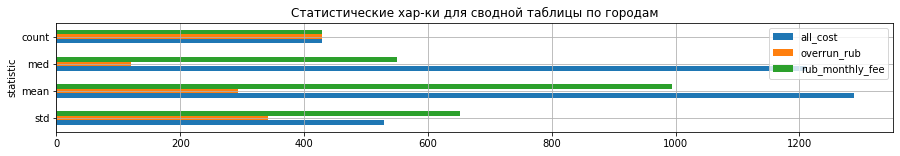

In [89]:
stat_par.iloc[1:].plot(kind='barh',grid=True, figsize=(15,2), title='Статистические хар-ки для сводной таблицы по городам');

Статистические показатели указывают, что в среднем переплата по связи 120 (по медиане), а с учетом станлартного отклонения +/-120 руб. Общая стоимость колеблется 1210 +/-120 в среднем, где 550 в среднем переплата при n = 429 (86% от изначальной выборки)

In [90]:
temp_mes = messages.pivot_table(index='message_date',\
                     values=['id','user_id','month'],\
                     aggfunc={'id':'count', 'user_id':'first', 'month':'first'})
temp_mes

,id,month,user_id
message_date,,,
2018-01-02,10,1,1055
2018-01-03,4,1,1055
2018-01-04,10,1,1032
2018-01-05,10,1,1032
2018-01-06,15,1,1155
...,...,...,...
2018-12-27,644,12,1000
2018-12-28,699,12,1000
2018-12-29,702,12,1000


#### Статистики
Сделаем специальную таблицу, в которую поместим основные статистики и показатели по звонкам/сообщениям/интернету.

In [91]:
calls = pd.read_csv(filename_calls)

a_1 = np.var(calls['duration'].fillna(1)).round(4)
a_2 = np.var(calls['duration'].fillna(calls['duration'].median())).round(4)
a_3 = np.var(calls[calls['duration'] >= 1]['duration']).round(4)

b = np.var(internet['mb_used'].round(4))
c = np.var(temp_mes['id']).round(4)

d_1 = np.sqrt(np.var(calls['duration'].fillna(1))).round(4)
d_2 = np.sqrt(np.var(calls['duration'].fillna(calls['duration'].median()))).round(4)
d_3 = np.sqrt(np.var(calls[calls['duration'] != 0]['duration'])).round(4)

e = np.sqrt(np.var(internet['mb_used'])).round(4)
f = np.sqrt(np.var(temp_mes['id'])).round(4)

statistics = pd.DataFrame({\
             'statistic' : ['var','std', 'mean', 'med', 'count'],\
             'calls_replace_1' : [a_1,d_1,calls['duration'].fillna(1).mean(),\
                                  calls['duration'].fillna(1).median(),\
                                  calls['duration'].count()],\
             'calls_replace_med' : [a_2,d_2,\
                                    calls['duration'].fillna(calls['duration'].median()).mean(),\
                                    calls['duration'].fillna(calls['duration'].median()).median(),\
                                    calls['duration'].count()],\
             'calls_clean' : [a_3,d_3,\
                              calls['duration'].fillna(calls[calls['duration'] >=1]['duration']).mean(),\
                              calls['duration'].fillna(calls[calls['duration'] >=1]['duration']).median(),\
                              calls['duration'].count()],\
             'internet' : [b,e,internet['mb_used'].mean(), internet['mb_used'].median(), internet['mb_used'].count()],\
             'messages' : [c,f,temp_mes['id'].mean(), temp_mes['id'].median(), temp_mes['id'].count()]})
statistics.set_index('statistic', inplace=True)
statistics.round(1)

map_statistics = pd.merge(stat_par, statistics, on ='statistic', how='inner', suffixes=('_old', '_new'))
map_statistics.unstack().unstack()

statistic,var,std,mean,med,count
all_cost,280147.480000,529.290000,1287.670000,1210.0,429.0
overrun_rub,116605.490000,341.480000,293.850000,120.0,429.0
rub_monthly_fee,424373.264653,651.439379,993.822844,550.0,429.0
calls_replace_1,34.144700,5.843400,6.755887,6.0,202607.0
calls_replace_med,34.144700,5.843400,6.755887,6.0,202607.0
calls_clean,26.661200,5.353000,6.755887,6.0,202607.0
internet,77498.813809,278.386100,370.622098,349.0,149396.0
messages,43085.697700,207.570900,338.010989,335.0,364.0


In [92]:
calls = pd.read_csv(filename_calls)
#temp_calls = 

a_1 = np.var(calls['duration'].fillna(1)).round(4)
a_2 = np.var(calls['duration'].fillna(calls['duration'].median())).round(4)
a_3 = np.var(calls[calls['duration'] >= 1]['duration']).round(4)

b = np.var(internet['mb_used'].round(4))
c = np.var(temp_mes['id']).round(4)

d_1 = np.sqrt(np.var(calls['duration'].fillna(1))).round(4)
d_2 = np.sqrt(np.var(calls['duration'].fillna(calls['duration'].median()))).round(4)
d_3 = np.sqrt(np.var(calls[calls['duration'] != 0]['duration'])).round(4)

e = np.sqrt(np.var(internet['mb_used'])).round(4)
f = np.sqrt(np.var(temp_mes['id'])).round(4)

statistics = pd.DataFrame({\
             'statistic' : ['var','std', 'mean', 'med', 'count'],\
             'calls_replace_1' : [a_1,\
                                  d_1,\
                                  calls['duration'].fillna(1).mean(),\
                                  calls['duration'].fillna(1).median(),\
                                  calls['duration'].count()],\
             'calls_replace_med' : [a_2,\
                                    d_2,\
                                    calls['duration'].fillna(calls['duration'].median()).mean(),\
                                    calls['duration'].fillna(calls['duration'].median()).median(),\
                                    calls['duration'].count()],\
             'calls_clean' : [a_3,\
                              d_3,\
                              calls['duration'].fillna(calls[calls['duration'] >=1]['duration']).mean(),\
                              calls['duration'].fillna(calls[calls['duration'] >=1]['duration']).median(),\
                              calls['duration'].count()],\
             'internet' : [b,\
                           e,\
                           internet['mb_used'].mean(),\
                           internet['mb_used'].median(),\
                           internet['mb_used'].count()],\
             'messages' : [c,\
                           f,\
                           temp_mes['id'].mean(),\
                           temp_mes['id'].median(),
                           temp_mes['id'].count()]})

statistics.set_index('statistic', inplace=True)
statistics.round(1)

map_statistics = pd.merge(stat_par, statistics, on ='statistic', how='inner', suffixes=('_old', '_new'))
map_statistics.unstack().unstack()

statistic,var,std,mean,med,count
all_cost,280147.480000,529.290000,1287.670000,1210.0,429.0
overrun_rub,116605.490000,341.480000,293.850000,120.0,429.0
rub_monthly_fee,424373.264653,651.439379,993.822844,550.0,429.0
calls_replace_1,34.144700,5.843400,6.755887,6.0,202607.0
calls_replace_med,34.144700,5.843400,6.755887,6.0,202607.0
calls_clean,26.661200,5.353000,6.755887,6.0,202607.0
internet,77498.813809,278.386100,370.622098,349.0,149396.0
messages,43085.697700,207.570900,338.010989,335.0,364.0


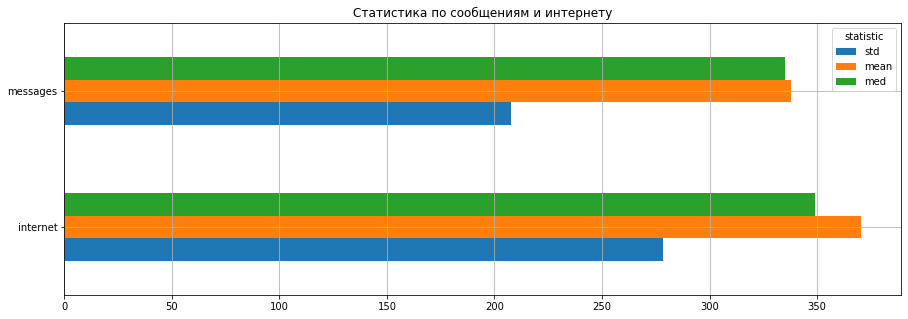

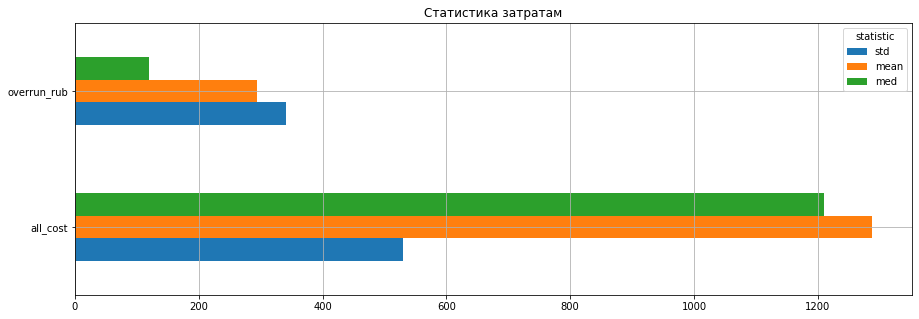

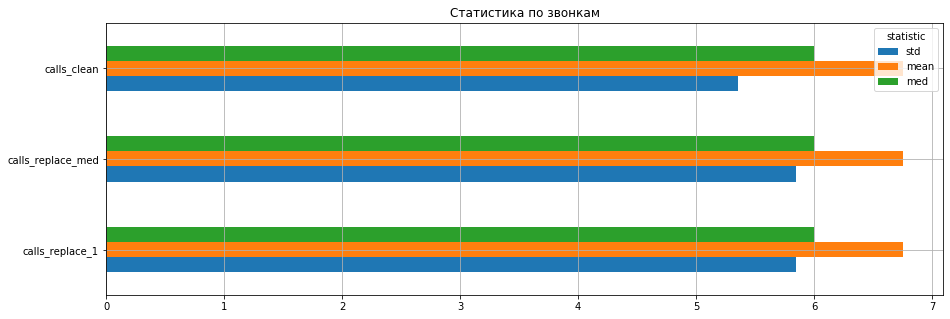

In [93]:
(map_statistics
 .iloc[1:4]
 .unstack().unstack()
 .loc['internet':'messages']
 .plot(kind='barh',grid=True, title='Статистика по сообщениям и интернету')
);
(map_statistics
 .iloc[1:4]
 .unstack().unstack()
 .loc['all_cost':'overrun_rub']
 .plot(kind='barh',grid=True, title='Статистика затратам')
);
(map_statistics
 .iloc[1:4]
 .unstack().unstack()
 .loc['calls_replace_1':'calls_clean']
 .plot(kind='barh',grid=True, title='Статистика по звонкам')
);
plt.show()

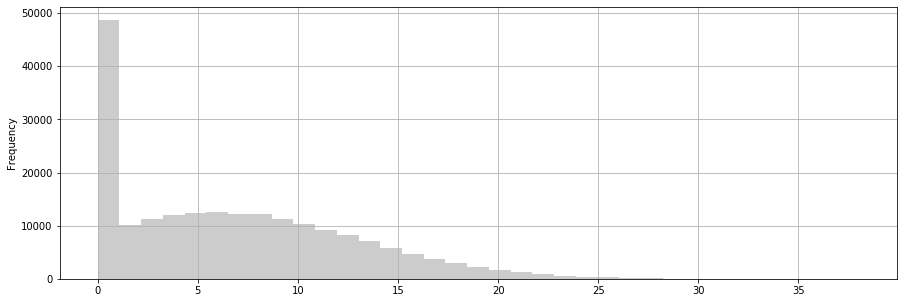

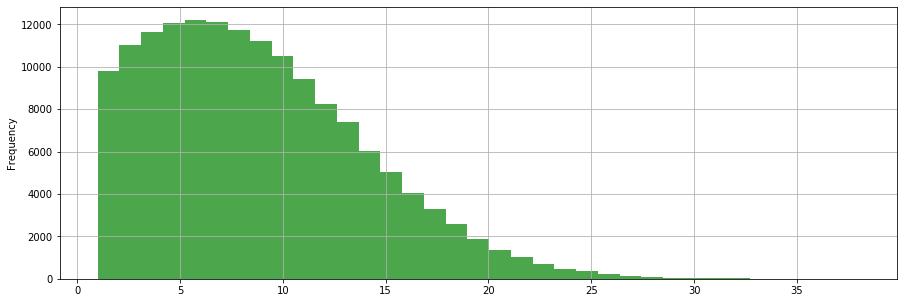

In [94]:
(calls.duration.fillna(1)).plot.hist(bins=35, alpha=.4, color='grey', grid=True)
plt.show()
calls.query('duration >=1 ').duration.plot.hist(bins=35, alpha=.7, color='green', grid=True)
plt.show()

##### Шаг 2 - Проверка
- [x] Приведите данные к нужным типам;
- [x] Найдите и исправьте ошибки в данных.
- [x] Поясните, какие ошибки вы нашли и как их исправили. Обратите внимание, что у большого количества звонков длительность — 0.0 минут. Это проблема в данных, нужна предобработка.
Посчитайте для каждого пользователя:
- [x] количество сделанных звонков и израсходованных минут разговора по месяцам;
- [x] количество отправленных сообщений по месяцам;
- [x] объем израсходованного интернет-трафика по месяцам;
- [x] помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

##### Итог Шаг 2 - выполнен полностью

---

##### Шаг 3 - Проверка
- [x] Опишите поведение клиентов оператора, исходя из выборки.
- [x] Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? - [x] Посчитайте среднее количество, дисперсию и стандартное отклонение.
- [x] Постройте гистограммы.
- [x] Опишите распределения.

##### Итог Шаг 3 - выполнен полностью

## Вывод:
1. Среднее значение очень плохо описывает данную выборку, поэтому используем медианы.
2. Москва и Питер - топ городов с высоким использоваем услуг по тарифу, также в данных городах самая высокая длительность разговоров.
3. Перерасход генерируется по тарифу "Смарт", по большей части по объёму отправленных сообщений, по тарифу "Ультра" перерасхода не зафиксировано, а даже наоборот обнаружено, что объёма услуг хаватет всем абонентам.
4. Среднее количество сообщений примерно во все месяцы одинаково, но звонкив первые 3 месяца не имеют четкой структуры.
5. Замена нулевой длительности была сделана на медианное значение, как более вероятное.

## Шаг 4. Провека гипотезы
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

>Пороговое значение alpha задайте самостоятельно.
* Поясните:
    * как вы формулировали нулевую и альтернативную гипотезы;
    * какой критерий использовали для проверки гипотез и почему.

In [95]:
new_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 428
Data columns (total 30 columns):
user_id                  429 non-null int64
active_internet_month    429 non-null float64
mean_internet_month      429 non-null float64
active_calls_month       429 non-null float64
mean_calls_month         429 non-null float64
active_message_month     429 non-null float64
mean_messages_month      429 non-null float64
age                      429 non-null int64
city                     429 non-null object
tariff                   429 non-null object
name                     429 non-null object
status                   429 non-null object
status_tariff            429 non-null object
messages_included        429 non-null int64
mg_per_month_included    429 non-null int64
minutes_included         429 non-null int64
rub_monthly_fee          429 non-null int64
rub_per_gb               429 non-null int64
rub_per_message          429 non-null int64
rub_per_minute           429 non-null int6

In [96]:
new_stat.head()

,user_id,active_internet_month,mean_internet_month,active_calls_month,mean_calls_month,active_message_month,mean_messages_month,age,city,tariff,name,status,status_tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,calls_per_month,message_per_month,internet_per_month,delta_calls,delta_internet,delta_messages,overrun_rub,delta_over,all_cost
0,1000,8.0,537.062500,8.0,8.153299,8.0,9.0,52,Краснодар,ultra,Рафаил Верещагин,активен,two,1000,30720,3000,1950,150,1,1,ultra,244.598963,270.0,16111.875000,0.918467,0.475525,0.73,0.0,0.0,1950.0
1,1003,5.0,523.300000,5.0,8.462326,5.0,6.0,23,Москва,ultra,Белла Белякова,активен,two,1000,30720,3000,1950,150,1,1,ultra,253.869772,180.0,15699.000000,0.915377,0.488965,0.82,0.0,0.0,1950.0
2,1004,8.0,500.187500,8.0,6.779923,8.0,9.0,68,Новокузнецк,ultra,Татьяна Авдеенко,активен,two,1000,30720,3000,1950,150,1,1,ultra,203.397694,270.0,15005.625000,0.932201,0.511536,0.73,0.0,0.0,1950.0
3,1016,2.0,550.750000,2.0,7.718750,2.0,3.0,58,Омск,ultra,Марица Сазонова,активен,two,1000,30720,3000,1950,150,1,1,ultra,231.562500,90.0,16522.500000,0.922813,0.462158,0.91,0.0,0.0,1950.0
4,1018,9.0,548.555556,9.0,8.205676,9.0,10.0,71,Уфа,ultra,Матвей Золотов,активен,two,1000,30720,3000,1950,150,1,1,ultra,246.170294,300.0,16456.666667,0.917943,0.464301,0.70,0.0,0.0,1950.0


In [97]:
sample_1 = list(new_stat[new_stat['tariff'] == 'ultra']['all_cost'])
for i in range(136,293):
    sample_1.append(1950)

print(len(sample_1))
print(len(list(new_stat[new_stat['tariff'] == 'smart']['all_cost'])))

293
293


### 1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

У нас есть две выборки:
1. По тарифу "Ультра", а вторая по "Смарт";
2. Гипотезы:
    * Нулевая гипотеза: Средняя выручка тарифов равна;
    * Альтернативная гитотеза: Средняя выручка по тарифу "Ультра" __НЕ РАВНА__ "Смарт";

In [98]:
from scipy import stats as st
import numpy as np

sample_1 = list(new_stat[new_stat['tariff'] == 'ultra']['all_cost'])
for i in range(136,293):
    sample_1.append(1950)
    
sample_2 = list(new_stat[new_stat['tariff'] == 'smart']['all_cost'])

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = True)

print('p-значение: {:.5f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00000
Отвергаем нулевую гипотезу


In [99]:
interested_value = 1950
    
alpha = .05 # критический уровень статистической значимости
    
results = st.ttest_1samp(
    sample_2, 
    interested_value)

summ = 0
for i in sample_2:
    summ += i
mean = summ/len(sample_2)

print('p-значение: {:.5f}'.format(results.pvalue))
    
if (results.pvalue/2 < alpha)&(mean < interested_value): #двухстороняя гипотеза
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00000
Отвергаем нулевую гипотезу


### 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

У нас есть две выборки:
1. С городом Москва (30% записей) и другие регионы
2. Гипотезы:
    * Нулевая гипотеза: Средняя выручка Москвы равна средней выручке других регионов;
    * Альтернативная гитотеза:  Средняя выручка Москвы __НЕ РАВНА__ средней выручке других регионов;

In [100]:
new_stat['moscow'] = new_stat['city'] == 'Москва'
new_stat[new_stat['moscow'] == True].count().max()/new_stat[new_stat['moscow'] != True].count().max()

0.3

In [101]:
sample_moscow = list(new_stat[new_stat['moscow'] == True]['all_cost'])
    
sample_other = list(new_stat[new_stat['moscow'] == False]['all_cost'])

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_moscow, 
    sample_other,
    equal_var = True)

print('p-значение: {:.5f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.27066
Не получилось отвергнуть нулевую гипотезу


In [102]:
print('Средняя выручка по москве',new_stat[new_stat['moscow'] == True]['all_cost'].mean())
print('Средняя выручка по регионам', new_stat[new_stat['moscow'] == False]['all_cost'].mean())

Средняя выручка по москве 1236.1616161616162
Средняя выручка по регионам 1303.121212121212


## Вывод
При проверке статистических гипотез использовался метод st.ttest_ind и были получены следующие результаты:
* Нулевая гипотеза в пером случае говорила, что средняя выручка тарифов равна, но т.к. pvalue много меньше уровня значимости, мы понимаем что нулевая гипотеза опровергнута, значит имеет место быть альтернативной, которая говорит, что выручки тарифов неравны.
* Нулевая гипотеза говорит о том, что вывучка по Москве равна выручке по регионам и действительно - гипотеза не опровергнута, а p-value 27%. (*не доконца понимаю как трактовать p-value:)*)
Был выбран st.ttest_ind для обоих случаев, т.к. сравнивались выборки двух генеральных совокупностей, но в первом случае также был использован st.ttest_1samp, т.к. в тарифе ультра выручка от каждого абонента одинаковая и равна стоимости тарифа, поэтому была возможность проврить равенсто среднего выборки и интересующего нас значения.

---

# Итоговый вывод:
На вход были предоставлены 5 файлов формата .csv:
* calls;
* messages;
* internet;
* tariff;
* users;

Таблицы были проверенны на дубли, пропуски, некорректные типы и проблемы с данными. Проблема обнаружилась в таблице calls с длительностью звонков, т.к. порядка 19% записей имеют такие проблемы. Было выдвинуто 3 варианта развития событий:
1. замена по медиане: возможно получить искажённую картину по длительности, из-за того, что длительность была у данных звонков очень коротной и ситема не смогла зафиксировать её;
2. замена на 1: если действительно длительность была очень маленькой, то по правилам компании оператора, округить тербуется до единыцы минуты;
3. удаление проблемных данных - позволит избежать искажения картины, но уменьшить серьёзно выбоку данных, что может также негативно сказаться на адекватности анализа.

Был выбран вариант с заменой по медианному значению звонков с нулевой длительностью с учётом города звонков.

Оказалось:
1. Среднее значение очень плохо описывает данную выборку, поэтому используем медианы.
2. На основании анализа графиков, можно сказать, что среднее время разговора совершенно разное между городами, если в Санкт-Петербурге среднее 9 мин, то в Москве - 27 мин,  а в периферийных городах менее 5 минут. Одной из гипотез может быть, что Москва - столица и здесь активно проявляются деловые коммуникации, в сравнении с другими городами, где деловая активность мала, а также мало количественное моотношение. На основании предпоследнего графика можно сделать вывод, что не все возрастные группы представленны в городах, вернее в выборке не хватает данных по возрастной абонентской базе, поэтому нельзя точно говорить о влиянии возраста на длительности звонков.
3. Москва и Питер - топ городов с высоким использоваем услуг по тарифу, также в данных городах самая высокая длительность разговоров.
4. Перерасход генерируется по тарифу "Смарт", по большей части по объёму отправленных сообщений, по тарифу "Ультра" перерасхода не зафиксировано, а даже наоборот обнаружено, что объёма услуг хаватет всем абонентам.
5. Среднее количество сообщений примерно во все месяцы одинаково, но звонки впервые 3 месяца не имеют четкой структуры.
6. Замена нулевой длительности была сделана на медианное значение, как более вероятное.
7. Статистические показатели указывают, что в среднем переплата по связи 120 (по медиане), а с учетом станлартного отклонения +/-120 руб. Общая стоимость колеблется 1210 +/-120 в среднем, где 550 в среднем переплата при n = 429 (86% от изначальной выборки)
8. При проверке статистических гипотез использовался метод st.ttest_ind и были получены следующие результаты:
* Нулевая гипотеза в пером случае говорила, что средняя выручка тарифов равна, но т.к. pvalue много меньше уровня значимости, мы понимаем что нулевая гипотеза опровергнута, значит имеет место быть альтернативной, которая говорит, что выручки тарифов неравны.
* Нулевая гипотеза говорит о том, что вывучка по Москве равна выручке по регионам и действительно - гипотеза не опровергнута, а p-value 27%. (*не доконца понимаю как трактовать p-value:)*)
* Был выбран st.ttest_ind для обоих случаев, т.к. сравнивались выборки двух генеральных совокупностей, но в первом случае также был использован st.ttest_1samp, т.к. в тарифе ультра выручка от каждого абонента одинаковая и равна стоимости тарифа, поэтому была возможность проврить равенсто среднего выборки и интересующего нас значения.
9. Выборка оказалась достаточно малой, поэтому регрессилонных связей практически не обнаружено между показателями, кроме соответствия месячной длительности звонков и интернет трафика.
10. Пользователи используют не весь спектр услуг:
    * телефонными звонками не пользуются менее 1%;
    * интернетом не пользуются менее 1%;
    * сообщениями не пользуются менее 14%;
    